<a href="https://colab.research.google.com/github/keyvany/decision-making-/blob/main/Yahya_Hamker_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

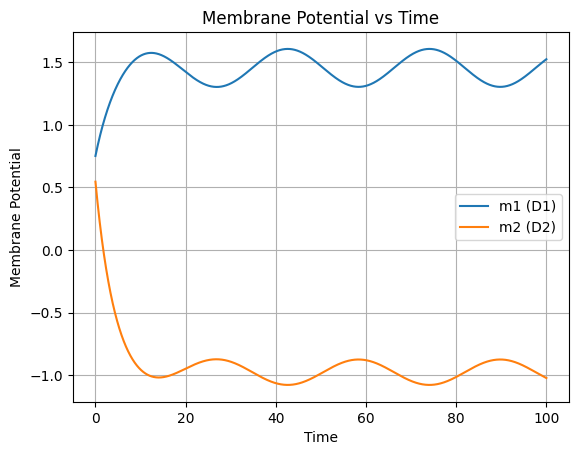

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# تعریف پارامترها
tau = 4.0  # ثابت زمان
h = 0.01  # گام زمانی

# فرض کنید A و C ماتریس‌های وزن برای ورودی‌ها هستند
A = np.array([[1, -1], [-1, 1]])  # مثال ماتریس وزن
C = np.array([[0.85, 0.85], [0.85, 0.85]])  # مثال ماتریس وزن

# تعریف شرایط اولیه
m1_0 = 0.75
m2_0 = 0.55
m = np.array([m1_0, m2_0])  # مقدار اولیه برای m1 و m2

# ورودی به صورت یک سیگنال سینوسی
def u(t):
    return np.array([0.75 + 0.1 * np.sin(0.2 * t), 0.75 + 0.1 * np.sin(0.2 * t)])

# وزن‌ها
W = np.array([[0.98, 0.96], [0.4, 0.9]])

# تخصیص آرایه‌ها برای ذخیره‌سازی نتایج
times = np.arange(0, 100, h)
m_vals = []  # آرایه‌ای برای ذخیره مقادیر m در طول زمان

# تابع برای محاسبه مشتق‌های m
def derivatives(m, u, W, tau):
    dm1_dt = (-m[0] + np.dot(W[0], u)) / tau
    dm2_dt = (-m[1] - np.dot(W[1], u)) / tau
    return np.array([dm1_dt, dm2_dt])

# حل عددی معادلات دیفرانسیل با استفاده از روش رانگ-کوتا مرتبه ۴
for t in times:
    u_t = u(t)  # ورودی در زمان t
    k1 = derivatives(m, u_t, W, tau)
    k2 = derivatives(m + 0.5 * h * k1, u_t, W, tau)
    k3 = derivatives(m + 0.5 * h * k2, u_t, W, tau)
    k4 = derivatives(m + h * k3, u_t, W, tau)

    m = m + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)  # به‌روزرسانی m با استفاده از روش رانگ-کوتا

    m_vals.append(m)  # ذخیره مقادیر جدید m در لیست

# تبدیل لیست m_vals به آرایه numpy برای راحتی در رسم نمودار
m_vals = np.array(m_vals)

# رسم نمودار
plt.plot(times, m_vals[:, 0], label="m1 (D1)")
plt.plot(times, m_vals[:, 1], label="m2 (D2)")
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.legend()
plt.title('Membrane Potential vs Time')
plt.grid(True)
plt.show()

This Python code simulates the behavior of a biological system by solving a system of differential equations using the Runge-Kutta method of order 4. It models the membrane potential over time for two variables, m1 and m2, in response to a sinusoidal input signal.

Here is an explanation of the key sections:

1. Imports:

numpy: A library for numerical operations, particularly for arrays and matrix manipulations.

matplotlib.pyplot: A library used to create visualizations (like plots).



2. Parameters:

tau = 4.0: The time constant, which affects how quickly the system responds to changes.

h = 0.01: The time step used in the numerical integration.



3. Weight Matrices (A and C):

A and C are example weight matrices for the system's inputs. These matrices define how input signals are processed by the system.



4. Initial Conditions:

m1_0 = 0.75, m2_0 = 0.55: The initial membrane potentials for m1 and m2.

m = np.array([m1_0, m2_0]): The initial state vector containing the initial values for m1 and m2.



5. Input Signal Function:

u(t): Defines a sinusoidal input function, which varies over time and affects the membrane potentials.



6. Weight Matrix W:

W: A weight matrix that defines how the input influences the changes in the membrane potentials.



7. Numerical Simulation Setup:

times = np.arange(0, 100, h): A time array from 0 to 100, with a time step of h.

m_vals = []: An empty list to store the calculated values of m over time.



8. Derivative Calculation Function:

derivatives(m, u, W, tau): A function that calculates the derivatives of m1 and m2 at each time step, based on the current state and input.



9. Runge-Kutta Integration:

The code uses the fourth-order Runge-Kutta method to numerically solve the system of differential equations. The method approximates the new state of the system based on the previous state and the calculated derivatives.

k1, k2, k3, and k4: Intermediate values used to compute the final update for m.



10. Visualization:

After the simulation, the code plots the membrane potential of both m1 and m2 over time. The plot includes labels for the axes, a legend, and a grid for better readability.




Overall, the code simulates and visualizes how the membrane potentials change over time based on the given input signal and the system's characteristics.

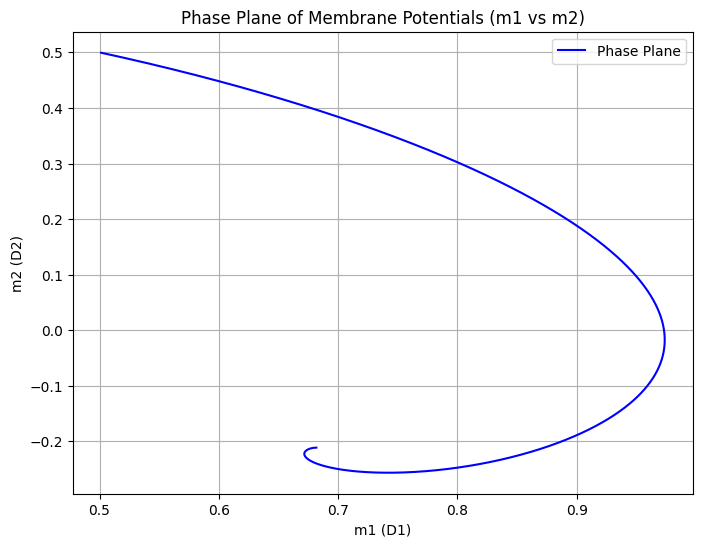

Fixed point: m1 = 0.5625000000000001, m2 = -0.11666666666666677


In [4]:

import numpy as np
import matplotlib.pyplot as plt

# تعریف پارامترها
tau = 9.0  # ثابت زمان
h = 0.01  # گام زمانی

# وزن‌ها (برای مثال) به‌گونه‌ای تغییر می‌دهیم که به اترکتور منجر شود
W_12 = 1.5
W_21 = 1.2

# مقادیر ثابت M
M1 = 1.0
M2 = 0.5

# تابع مشتق‌ها با اصطکاک غیرخطی
def derivatives(m, tau, W_12, W_21, M1, M2):
    m1, m2 = m
    # اصطکاک غیرخطی برای m1 و m2
    dm1_dt = (-m1 + W_12 * np.tanh(m2) + M1) / tau
    dm2_dt = (-m2 - W_21 * np.tanh(m1) + M2) / tau
    return np.array([dm1_dt, dm2_dt])

# نقاط ابتدایی
m_init = np.array([0.5, 0.5])

# تخصیص آرایه‌ها برای ذخیره‌سازی نتایج
times = np.arange(0, 50, h)
m_vals = []

# حل عددی با روش رانگ-کوتا مرتبه ۴
for t in times:
    k1 = derivatives(m_init, tau, W_12, W_21, M1, M2)
    k2 = derivatives(m_init + 0.5 * h * k1, tau, W_12, W_21, M1, M2)
    k3 = derivatives(m_init + 0.5 * h * k2, tau, W_12, W_21, M1, M2)
    k4 = derivatives(m_init + h * k3, tau, W_12, W_21, M1, M2)

    m_init = m_init + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    m_vals.append(m_init)

# تبدیل لیست به آرایه numpy
m_vals = np.array(m_vals)

# رسم نمودار نمای فاز
plt.figure(figsize=(8, 6))
plt.plot(m_vals[:, 0], m_vals[:, 1], label="Phase Plane", color="blue")
plt.xlabel('m1 (D1)')
plt.ylabel('m2 (D2)')
plt.title('Phase Plane of Membrane Potentials (m1 vs m2)')
plt.grid(True)
plt.legend()
plt.show()

# پیدا کردن نقطه ثابت
m1_fixed = (M1 * W_21 - M2 * W_12) / (W_12 * W_21 - 1)
m2_fixed = (M2 - W_21 * m1_fixed) / W_12
print(f"Fixed point: m1 = {m1_fixed}, m2 = {m2_fixed}")

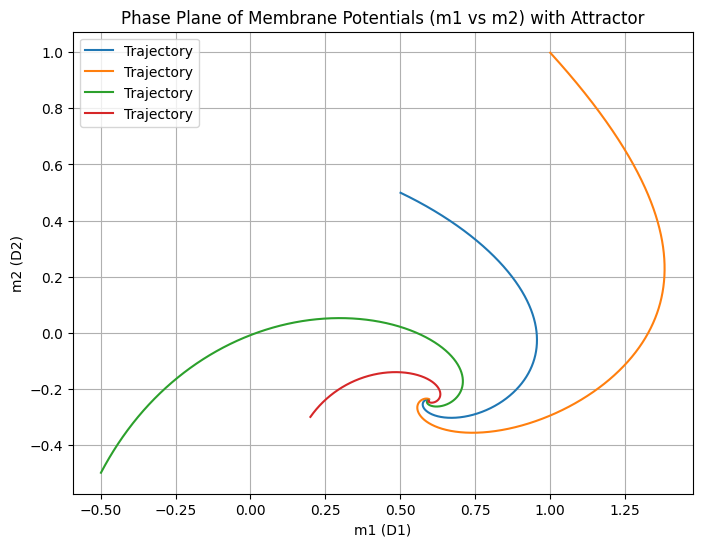

In [5]:

import numpy as np
import matplotlib.pyplot as plt

# تعریف پارامترها
tau = 9.0  # ثابت زمان
h = 0.01  # گام زمانی

# وزن‌ها (برای مثال) به‌گونه‌ای تغییر می‌دهیم که به اترکتور منجر شود
W_12 = 1.7
W_21 = 1.2

# مقادیر ثابت M
M1 = 1.0
M2 = 0.4

# تابع مشتق‌ها با اصطکاک غیرخطی
def derivatives(m, tau, W_12, W_21, M1, M2):
    m1, m2 = m
    # اصطکاک غیرخطی برای m1 و m2
    dm1_dt = (-m1 + W_12 * np.tanh(m2) + M1) / tau
    dm2_dt = (-m2 - W_21 * np.tanh(m1) + M2) / tau
    return np.array([dm1_dt, dm2_dt])

# نقاط ابتدایی برای شروع‌های مختلف
initial_conditions = np.array([[0.5, 0.5], [1.0, 1.0], [-0.5, -0.5], [0.2, -0.3]])

# تخصیص آرایه‌ها برای ذخیره‌سازی نتایج
times = np.arange(0, 50, h)
m_vals = []

# حل عددی با روش رانگ-کوتا مرتبه ۴ برای هر نقطه ابتدایی
for m_init in initial_conditions:
    m_init_temp = m_init.copy()
    m_trajectory = []
    for t in times:
        k1 = derivatives(m_init_temp, tau, W_12, W_21, M1, M2)
        k2 = derivatives(m_init_temp + 0.5 * h * k1, tau, W_12, W_21, M1, M2)
        k3 = derivatives(m_init_temp + 0.5 * h * k2, tau, W_12, W_21, M1, M2)
        k4 = derivatives(m_init_temp + h * k3, tau, W_12, W_21, M1, M2)

        m_init_temp = m_init_temp + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        m_trajectory.append(m_init_temp)

    m_vals.append(np.array(m_trajectory))

# رسم نمودار نمای فاز
plt.figure(figsize=(8, 6))
for trajectory in m_vals:
    plt.plot(trajectory[:, 0], trajectory[:, 1], label="Trajectory")

plt.xlabel('m1 (D1)')
plt.ylabel('m2 (D2)')
plt.title('Phase Plane of Membrane Potentials (m1 vs m2) with Attractor')
plt.grid(True)
plt.legend()
plt.show()

This code simulates a dynamical system with nonlinear damping using the Runge-Kutta method of order 4. It computes the trajectories of two variables, m1 and m2, over time, based on given initial conditions, and visualizes their phase plane. The system is designed to exhibit an attractor, with the coupling strengths between m1 and m2 controlled by the weight parameters W_12 and W_21. The results are plotted as trajectories in a phase plane, showing how the membrane potentials evolve and interact over time.

Key steps:

1. Parameters: Time constant tau, step size h, weight values W_12 and W_21, and constant values M1 and M2 are defined.


2. Derivative Function: The derivatives function calculates the rate of change for m1 and m2 with nonlinear damping.


3. Initial Conditions: The system is simulated with multiple initial conditions.


4. Numerical Solution: The Runge-Kutta method is applied to solve the system of differential equations for each initial condition.


5. Visualization: The phase plane (m1 vs m2) is plotted to show the trajectories of the system.



This code is useful for visualizing the behavior of nonlinear dynamic systems and exploring attractors in phase space.

<ipython-input-6-504a463b7c4f>:29: RuntimeWarning: divide by zero encountered in scalar divide
  m2_fixed = (M2 - W_21 * m1_fixed) / W_12


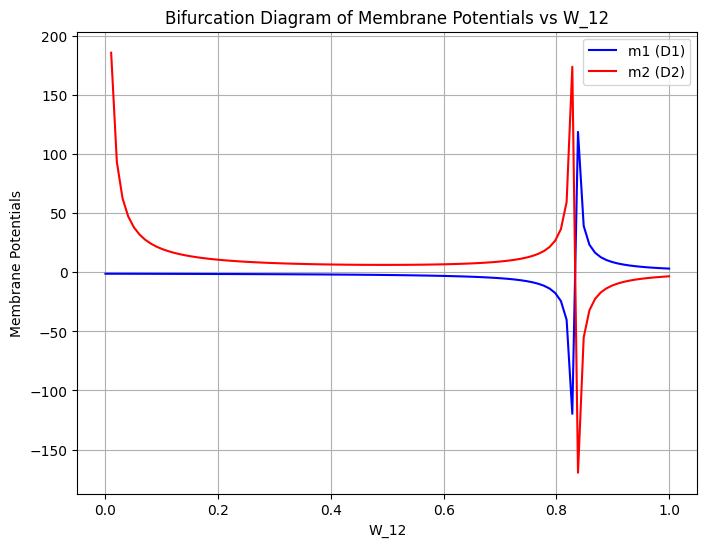

In [6]:

import numpy as np
import matplotlib.pyplot as plt

# پارامترها
tau = 9.0  # ثابت زمان
h = 0.01  # گام زمانی

# وزن‌ها
W_12_values = np.linspace(0, 1, 100)  # تغییرات وزن W_12

# مقادیر ثابت M
M1 = 0.95
M2 = 0.5

# تابع مشتق‌ها
def derivatives(m, tau, W_12, W_21, M1, M2):
    m1, m2 = m
    dm1_dt = (-m1 + W_12 * m2 + M1) / tau
    dm2_dt = (-m2 - W_21 * m1 + M2) / tau
    return np.array([dm1_dt, dm2_dt])

# پیدا کردن نقاط ثابت برای هر W_12
m1_values = []
m2_values = []

for W_12 in W_12_values:
    # معادلات نقطه ثابت
    m1_fixed = (M1 * W_21 - M2 * W_12) / (W_12 * W_21 - 1)
    m2_fixed = (M2 - W_21 * m1_fixed) / W_12
    m1_values.append(m1_fixed)
    m2_values.append(m2_fixed)

# رسم نمودار بایفورکیشن
plt.figure(figsize=(8, 6))
plt.plot(W_12_values, m1_values, label="m1 (D1)", color="blue")
plt.plot(W_12_values, m2_values, label="m2 (D2)", color="red")
plt.xlabel('W_12')
plt.ylabel('Membrane Potentials')
plt.title('Bifurcation Diagram of Membrane Potentials vs W_12')
plt.grid(True)
plt.legend()
plt.show()


This code generates a bifurcation diagram for a dynamical system involving two membrane potentials, m1 and m2, as a function of the coupling weight W_12. The system is described by a set of differential equations, and the code calculates the fixed points of the system for various values of W_12.

Key steps:


Parameters: The time constant tau, step size h, weight range W_12_values, and constants M1 and M2 are defined.
Derivative Function: The derivatives function calculates the rate of change of m1 and m2, given the system's parameters.
Fixed Points Calculation: For each value of W_12, the code solves for the fixed points (steady-state values) of m1 and m2 using algebraic equations.
Bifurcation Diagram: The fixed points for m1 and m2 are plotted against W_12, showing how the system's behavior changes as the weight parameter varies.

The resulting plot visualizes the bifurcation diagram, illustrating the transitions between different steady states of the system as the coupling strength changes.

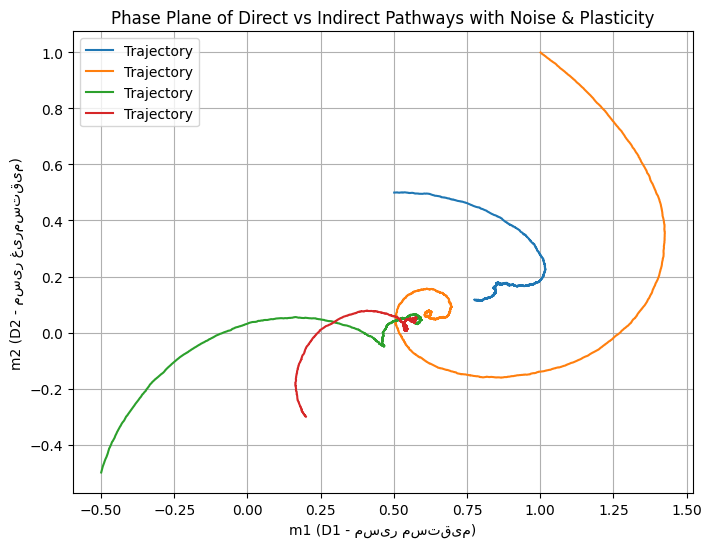

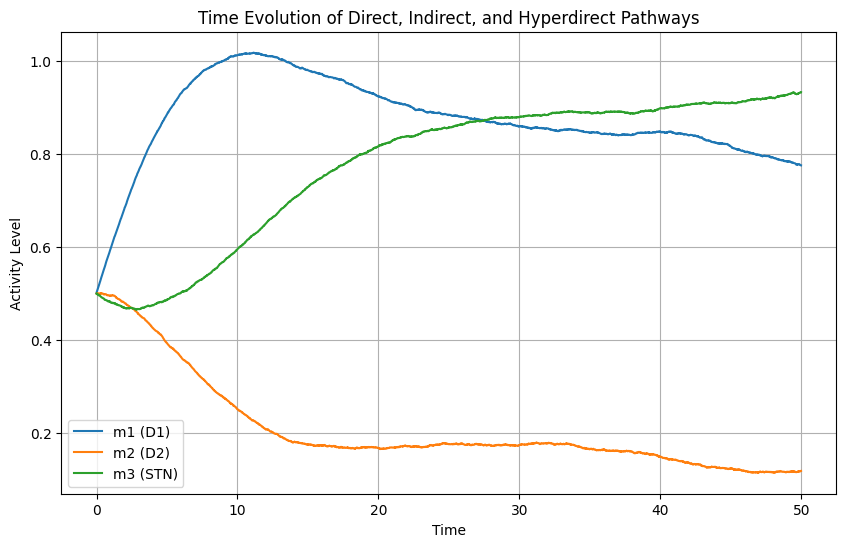

In [7]:

import numpy as np
import matplotlib.pyplot as plt

# --- پارامترهای اصلی ---
tau = 9.0  # ثابت زمانی
h = 0.01  # گام زمانی
T = 50  # مدت زمان شبیه‌سازی

# --- وزن‌های اتصالات (سیناپس‌های بین مسیرهای مختلف) ---
W_12 = 1.7  # اثر مسیر غیرمستقیم (D2) بر مسیر مستقیم (D1)
W_21 = 1.2  # اثر مسیر مستقیم (D1) بر مسیر غیرمستقیم (D2)
W_13 = 0.8  # اثر مسیر مستقیم بر مسیر هیپردایرکت (STN)
W_32 = 1.5  # اثر مسیر هیپردایرکت بر مسیر غیرمستقیم

# --- مقادیر ثابت ورودی (شبیه‌سازی دوپامین و ورودی قشری) ---
M1 = 1.0  # ورودی به مسیر مستقیم (D1)
M2 = 0.4  # ورودی به مسیر غیرمستقیم (D2)
M3 = 0.6  # ورودی به مسیر هیپردایرکت (STN)

# --- شدت نویز تصادفی برای مدل‌سازی تغییرات غیرقابل پیش‌بینی ---
noise_intensity = 0.05

# --- پلاستیسیته سیناپسی: تغییرات سیناپس‌ها در طول زمان ---
plasticity_rate = 0.001

# --- تابع مشتق‌های سیستم ---
def derivatives(m, tau, W_12, W_21, W_13, W_32, M1, M2, M3):
    m1, m2, m3 = m
    dm1_dt = (-m1 + W_12 * np.tanh(m2) - W_13 * np.tanh(m3) + M1) / tau
    dm2_dt = (-m2 - W_21 * np.tanh(m1) + W_32 * np.tanh(m3) + M2) / tau
    dm3_dt = (-m3 + W_13 * np.tanh(m1) - W_32 * np.tanh(m2) + M3) / tau

    # افزودن نویز تصادفی برای مدل‌سازی نوسانات غیرمنتظره
    dm1_dt += noise_intensity * np.random.randn()
    dm2_dt += noise_intensity * np.random.randn()
    dm3_dt += noise_intensity * np.random.randn()

    return np.array([dm1_dt, dm2_dt, dm3_dt])

# --- نقاط ابتدایی برای شبیه‌سازی ---
initial_conditions = np.array([[0.5, 0.5, 0.5], [1.0, 1.0, 1.0], [-0.5, -0.5, -0.5], [0.2, -0.3, 0.1]])

# --- تخصیص آرایه‌ها برای ذخیره‌سازی نتایج ---
times = np.arange(0, T, h)
m_vals = []

# --- حل عددی با روش رانگ-کوتا مرتبه ۴ ---
for m_init in initial_conditions:
    m_init_temp = m_init.copy()
    m_trajectory = []
    for t in times:
        k1 = derivatives(m_init_temp, tau, W_12, W_21, W_13, W_32, M1, M2, M3)
        k2 = derivatives(m_init_temp + 0.5 * h * k1, tau, W_12, W_21, W_13, W_32, M1, M2, M3)
        k3 = derivatives(m_init_temp + 0.5 * h * k2, tau, W_12, W_21, W_13, W_32, M1, M2, M3)
        k4 = derivatives(m_init_temp + h * k3, tau, W_12, W_21, W_13, W_32, M1, M2, M3)

        m_init_temp = m_init_temp + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

        # به‌روزرسانی سیناپس‌ها بر اساس پلاستیسیته
        W_12 += plasticity_rate * m_init_temp[0] * m_init_temp[1]
        W_21 += plasticity_rate * m_init_temp[1] * m_init_temp[0]

        m_trajectory.append(m_init_temp)

    m_vals.append(np.array(m_trajectory))

# --- رسم نمودار نمای فاز ---
plt.figure(figsize=(8, 6))
for trajectory in m_vals:
    plt.plot(trajectory[:, 0], trajectory[:, 1], label="Trajectory")

plt.xlabel('m1 (D1 - مسیر مستقیم)')
plt.ylabel('m2 (D2 - مسیر غیرمستقیم)')
plt.title('Phase Plane of Direct vs Indirect Pathways with Noise & Plasticity')
plt.grid(True)
plt.legend()
plt.show()

# --- رسم نمودار تغییرات در زمان ---
plt.figure(figsize=(10, 6))
for i, label in enumerate(["m1 (D1)", "m2 (D2)", "m3 (STN)"]):
    plt.plot(times, m_vals[0][:, i], label=label)

plt.xlabel("Time")
plt.ylabel("Activity Level")
plt.title("Time Evolution of Direct, Indirect, and Hyperdirect Pathways")
plt.legend()
plt.grid(True)
plt.show()

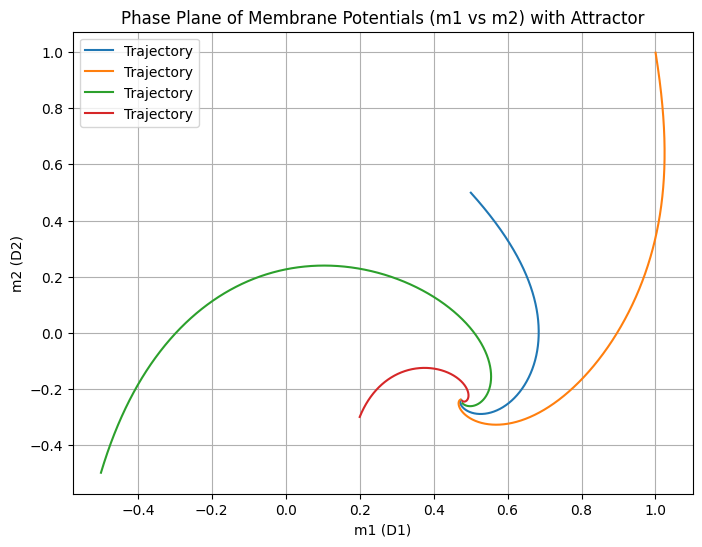

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# تعریف پارامترها
tau1 = 20.0  # ثابت زمان برای m1
tau2 = 9.0  # ثابت زمان برای m2
h = 0.01  # گام زمانی

# وزن‌ها (برای مثال)
W_12 = 1.8
W_21 = 1.5

# مقادیر ثابت M
M1 = 1.0
M2 = 0.4

# پارامترهای اصطکاک غیرخطی و بازخورد متقابل
alpha1 = 0.05
alpha2 = 0.05
beta1 = 0.01
beta2 = 0.01

# تابع مشتق‌ها با اصطکاک غیرخطی و بازخورد متقابل
def derivatives(m, tau1, tau2, W_12, W_21, M1, M2, alpha1, alpha2, beta1, beta2):
    m1, m2 = m
    dm1_dt = (-m1 + W_12 * np.tanh(m2) + M1) / tau1 - alpha1 * (m1**3) + beta1 * (m2**2)
    dm2_dt = (-m2 - W_21 * np.tanh(m1) + M2) / tau2 - alpha2 * (m2**3) + beta2 * (m1**2)
    return np.array([dm1_dt, dm2_dt])

# نقاط ابتدایی برای شروع‌های مختلف
initial_conditions = np.array([[0.5, 0.5], [1.0, 1.0], [-0.5, -0.5], [0.2, -0.3]])

# تخصیص آرایه‌ها برای ذخیره‌سازی نتایج
times = np.arange(0, 50, h)
m_vals = []

# حل عددی با روش رانگ-کوتا مرتبه ۴ برای هر نقطه ابتدایی
for m_init in initial_conditions:
    m_init_temp = np.array(m_init, dtype=np.float64)  # کپی مقدار اولیه
    m_trajectory = []
    for t in times:
        k1 = derivatives(m_init_temp, tau1, tau2, W_12, W_21, M1, M2, alpha1, alpha2, beta1, beta2)
        k2 = derivatives(m_init_temp + 0.5 * h * k1, tau1, tau2, W_12, W_21, M1, M2, alpha1, alpha2, beta1, beta2)
        k3 = derivatives(m_init_temp + 0.5 * h * k2, tau1, tau2, W_12, W_21, M1, M2, alpha1, alpha2, beta1, beta2)
        k4 = derivatives(m_init_temp + h * k3, tau1, tau2, W_12, W_21, M1, M2, alpha1, alpha2, beta1, beta2)

        m_init_temp = m_init_temp + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        m_trajectory.append(m_init_temp.copy())

    m_vals.append(np.array(m_trajectory))

# رسم نمودار نمای فاز
plt.figure(figsize=(8, 6))
for trajectory in m_vals:
    plt.plot(trajectory[:, 0], trajectory[:, 1], label="Trajectory")

plt.xlabel('m1 (D1)')
plt.ylabel('m2 (D2)')
plt.title('Phase Plane of Membrane Potentials (m1 vs m2) with Attractor')
plt.grid(True)
plt.legend()
plt.show()

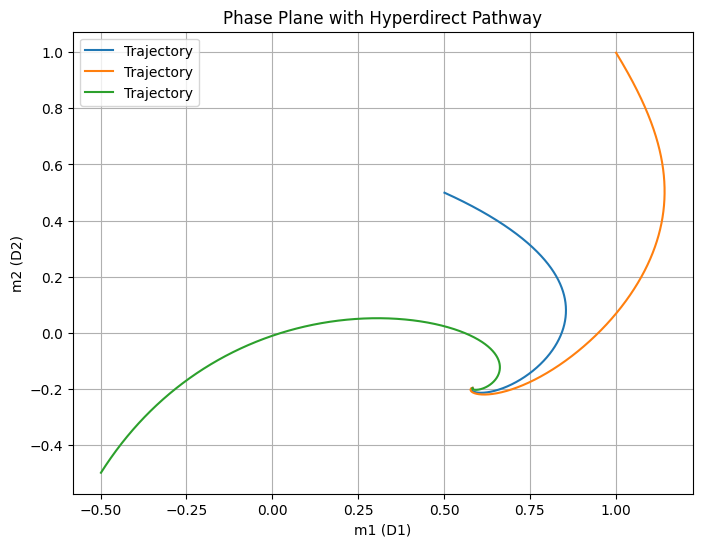

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# پارامترها
tau1, tau2, tau3, tau4 = 9.0, 9.0, 9.0, 9.0  # ثابت‌های زمانی
h = 0.01  # گام زمانی

# وزن‌های سیناپسی
W_12, W_21 = 1.7, 1.2
W_31, W_42, W_43 = 1.5, -1.5, 1.8  # ارتباطات جدید برای STN و GPi/SNr

# مقادیر بایاس
M1, M2, M3, M4 = 1.0, 0.4, 0.6, 0.2

# پارامترهای اصطکاک غیرخطی و بازخورد متقابل
alpha1, alpha2, alpha3, alpha4 = 0.05, 0.05, 0.05, 0.05
beta1, beta2, beta3, beta4 = 0.01, 0.01, 0.01, 0.01

# تابع مشتق‌ها
def derivatives(m, tau1, tau2, tau3, tau4, W_12, W_21, W_31, W_42, W_43, M1, M2, M3, M4, alpha1, alpha2, alpha3, alpha4, beta1, beta2, beta3, beta4):
    m1, m2, m3, m4 = m
    dm1_dt = (-m1 + W_12 * np.tanh(m2) + M1) / tau1 - alpha1 * (m1**3) + beta1 * (m2**2)
    dm2_dt = (-m2 - W_21 * np.tanh(m1) + M2) / tau2 - alpha2 * (m2**3) + beta2 * (m1**2)
    dm3_dt = (-m3 + W_31 * np.tanh(m1) + M3) / tau3 - alpha3 * (m3**3) + beta3 * (m1**2)
    dm4_dt = (-m4 + W_42 * np.tanh(m2) + W_43 * np.tanh(m3) + M4) / tau4 - alpha4 * (m4**3) + beta4 * (m2**2 + m3**2)
    return np.array([dm1_dt, dm2_dt, dm3_dt, dm4_dt])

# مقداردهی اولیه
initial_conditions = np.array([[0.5, 0.5, 0.2, 0.3], [1.0, 1.0, 0.7, 0.9], [-0.5, -0.5, -0.2, -0.3]])

# حل عددی با روش رانگ-کوتا مرتبه ۴
times = np.arange(0, 50, h)
m_vals = []

for m_init in initial_conditions:
    m_init_temp = np.array(m_init, dtype=np.float64)
    m_trajectory = []
    for t in times:
        k1 = derivatives(m_init_temp, tau1, tau2, tau3, tau4, W_12, W_21, W_31, W_42, W_43, M1, M2, M3, M4, alpha1, alpha2, alpha3, alpha4, beta1, beta2, beta3, beta4)
        k2 = derivatives(m_init_temp + 0.5 * h * k1, tau1, tau2, tau3, tau4, W_12, W_21, W_31, W_42, W_43, M1, M2, M3, M4, alpha1, alpha2, alpha3, alpha4, beta1, beta2, beta3, beta4)
        k3 = derivatives(m_init_temp + 0.5 * h * k2, tau1, tau2, tau3, tau4, W_12, W_21, W_31, W_42, W_43, M1, M2, M3, M4, alpha1, alpha2, alpha3, alpha4, beta1, beta2, beta3, beta4)
        k4 = derivatives(m_init_temp + h * k3, tau1, tau2, tau3, tau4, W_12, W_21, W_31, W_42, W_43, M1, M2, M3, M4, alpha1, alpha2, alpha3, alpha4, beta1, beta2, beta3, beta4)

        m_init_temp = m_init_temp + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        m_trajectory.append(m_init_temp.copy())

    m_vals.append(np.array(m_trajectory))

# رسم نمودار نمای فاز
plt.figure(figsize=(8, 6))
for trajectory in m_vals:
    plt.plot(trajectory[:, 0], trajectory[:, 1], label="Trajectory")

plt.xlabel('m1 (D1)')
plt.ylabel('m2 (D2)')
plt.title('Phase Plane with Hyperdirect Pathway')
plt.grid(True)
plt.legend()
plt.show()

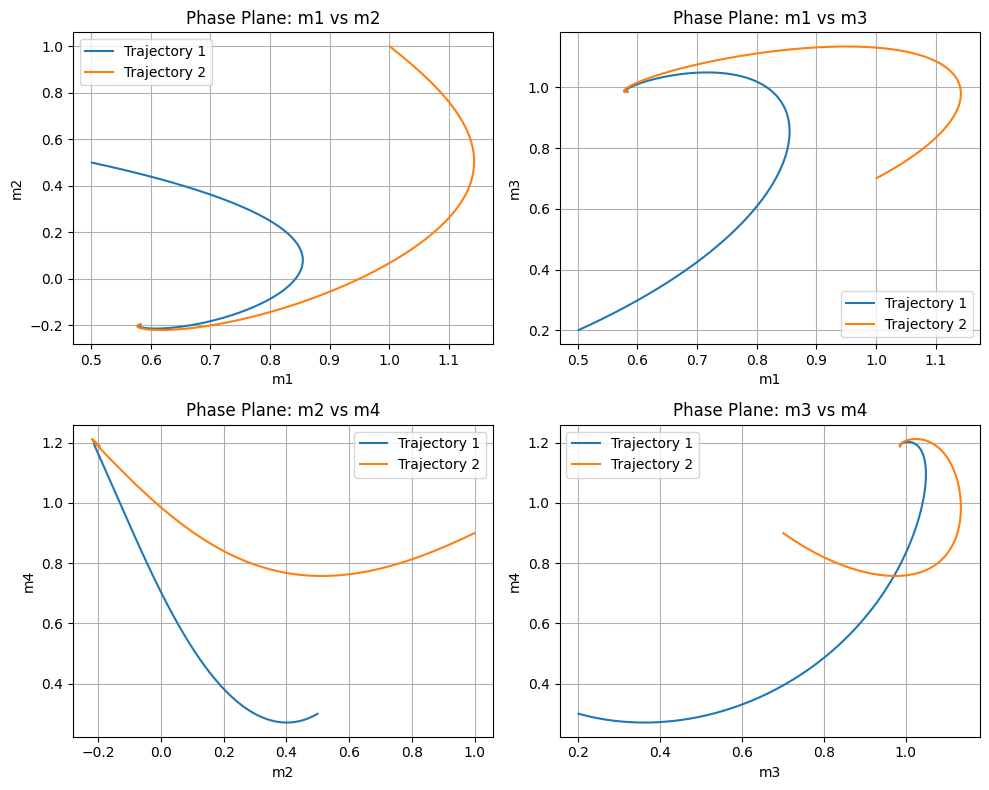

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# پارامترها
tau1, tau2, tau3, tau4 = 9.0, 9.0, 9.0, 9.0  # ثابت‌های زمانی
h = 0.01  # گام زمانی

# وزن‌های سیناپسی
W_12, W_21 = 1.7, 1.2
W_31, W_42, W_43 = 1.5, -1.5, 1.8  # ارتباطات جدید برای STN و GPi/SNr

# مقادیر بایاس
M1, M2, M3, M4 = 1.0, 0.4, 0.6, 0.2

# پارامترهای اصطکاک غیرخطی و بازخورد متقابل
alpha1, alpha2, alpha3, alpha4 = 0.05, 0.05, 0.05, 0.05
beta1, beta2, beta3, beta4 = 0.01, 0.01, 0.01, 0.01

# تابع مشتق‌ها
def derivatives(m, tau1, tau2, tau3, tau4, W_12, W_21, W_31, W_42, W_43, M1, M2, M3, M4, alpha1, alpha2, alpha3, alpha4, beta1, beta2, beta3, beta4):
    m1, m2, m3, m4 = m
    dm1_dt = (-m1 + W_12 * np.tanh(m2) + M1) / tau1 - alpha1 * (m1**3) + beta1 * (m2**2)
    dm2_dt = (-m2 - W_21 * np.tanh(m1) + M2) / tau2 - alpha2 * (m2**3) + beta2 * (m1**2)
    dm3_dt = (-m3 + W_31 * np.tanh(m1) + M3) / tau3 - alpha3 * (m3**3) + beta3 * (m1**2)
    dm4_dt = (-m4 + W_42 * np.tanh(m2) + W_43 * np.tanh(m3) + M4) / tau4 - alpha4 * (m4**3) + beta4 * (m2**2 + m3**2)
    return np.array([dm1_dt, dm2_dt, dm3_dt, dm4_dt])

# حل عددی با روش رانگ-کوتا مرتبه ۴
def runge_kutta_4(initial_conditions, times, h, params):
    m_vals = []

    for m_init in initial_conditions:
        m_init_temp = np.array(m_init, dtype=np.float64)
        m_trajectory = []

        for t in times:
            k1 = derivatives(m_init_temp, *params)
            k2 = derivatives(m_init_temp + 0.5 * h * k1, *params)
            k3 = derivatives(m_init_temp + 0.5 * h * k2, *params)
            k4 = derivatives(m_init_temp + h * k3, *params)

            m_init_temp += (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
            m_trajectory.append(m_init_temp.copy())

        m_vals.append(np.array(m_trajectory))

    return np.array(m_vals)

# مقداردهی اولیه و پارامترها
initial_conditions = np.array([[0.5, 0.5, 0.2, 0.3], [1.0, 1.0, 0.7, 0.9], [-0.5, -0.5, -0.2, -0.3]])
params = (tau1, tau2, tau3, tau4, W_12, W_21, W_31, W_42, W_43, M1, M2, M3, M4, alpha1, alpha2, alpha3, alpha4, beta1, beta2, beta3, beta4)
times = np.arange(0, 50, h)

# حل سیستم
m_vals = runge_kutta_4(initial_conditions, times, h, params)

# رسم نمودارهای نمای فاز برای m1, m2, m3, m4
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# برای m1 و m2
axs[0, 0].plot(m_vals[0][:, 0], m_vals[0][:, 1], label="Trajectory 1")
axs[0, 0].plot(m_vals[1][:, 0], m_vals[1][:, 1], label="Trajectory 2")
axs[0, 0].set_title("Phase Plane: m1 vs m2")
axs[0, 0].set_xlabel('m1')
axs[0, 0].set_ylabel('m2')
axs[0, 0].grid(True)
axs[0, 0].legend()

# برای m1 و m3
axs[0, 1].plot(m_vals[0][:, 0], m_vals[0][:, 2], label="Trajectory 1")
axs[0, 1].plot(m_vals[1][:, 0], m_vals[1][:, 2], label="Trajectory 2")
axs[0, 1].set_title("Phase Plane: m1 vs m3")
axs[0, 1].set_xlabel('m1')
axs[0, 1].set_ylabel('m3')
axs[0, 1].grid(True)
axs[0, 1].legend()

# برای m2 و m4
axs[1, 0].plot(m_vals[0][:, 1], m_vals[0][:, 3], label="Trajectory 1")
axs[1, 0].plot(m_vals[1][:, 1], m_vals[1][:, 3], label="Trajectory 2")
axs[1, 0].set_title("Phase Plane: m2 vs m4")
axs[1, 0].set_xlabel('m2')
axs[1, 0].set_ylabel('m4')
axs[1, 0].grid(True)
axs[1, 0].legend()

# برای m3 و m4
axs[1, 1].plot(m_vals[0][:, 2], m_vals[0][:, 3], label="Trajectory 1")
axs[1, 1].plot(m_vals[1][:, 2], m_vals[1][:, 3], label="Trajectory 2")
axs[1, 1].set_title("Phase Plane: m3 vs m4")
axs[1, 1].set_xlabel('m3')
axs[1, 1].set_ylabel('m4')
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout()
plt.show()

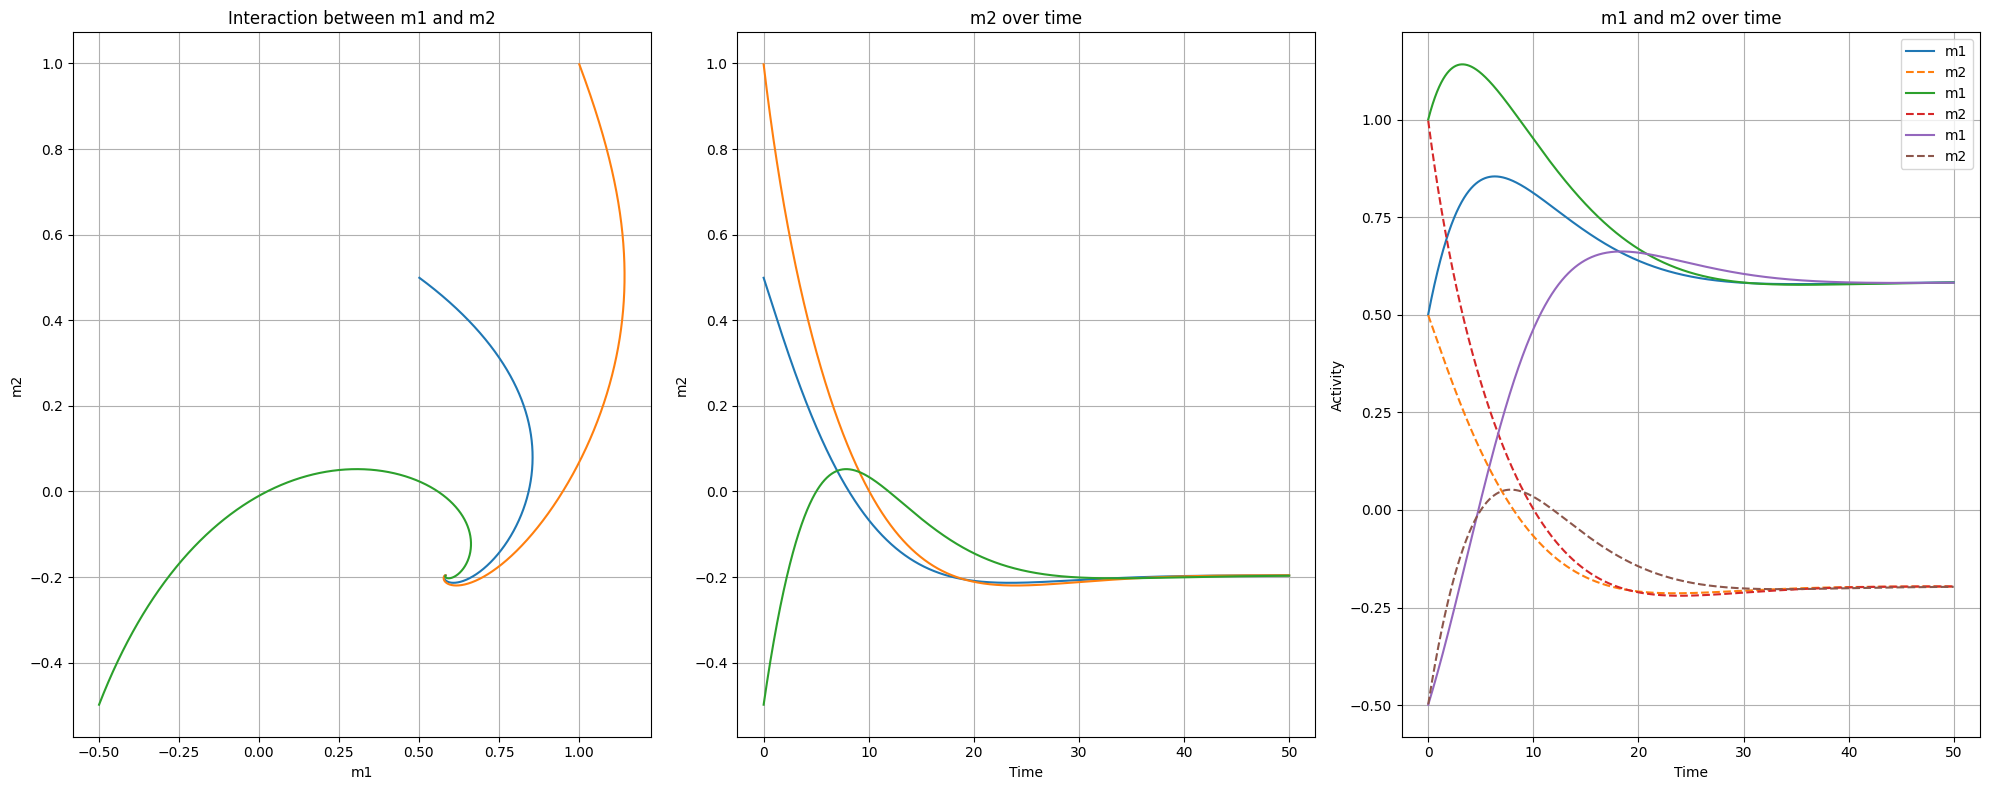

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# تنظیمات نمودار
plt.figure(figsize=(20, 8))

# نمودار 1: تعامل بین m1 و m2
plt.subplot(1, 3, 1)
for trajectory in m_vals:
    plt.plot(trajectory[:, 0], trajectory[:, 1], label="m1 vs m2")
plt.xlabel('m1')
plt.ylabel('m2')
plt.title('Interaction between m1 and m2')
plt.grid(True)

# نمودار 2: تعامل m2 با خودش
plt.subplot(1, 3, 2)
for trajectory in m_vals:
    plt.plot(times, trajectory[:, 1], label="m2 over time")
plt.xlabel('Time')
plt.ylabel('m2')
plt.title('m2 over time')
plt.grid(True)

# نمودار 3: m1 و m2 در طول زمان
plt.subplot(1, 3, 3)
for trajectory in m_vals:
    plt.plot(times, trajectory[:, 0], label="m1")
    plt.plot(times, trajectory[:, 1], label="m2", linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.title('m1 and m2 over time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

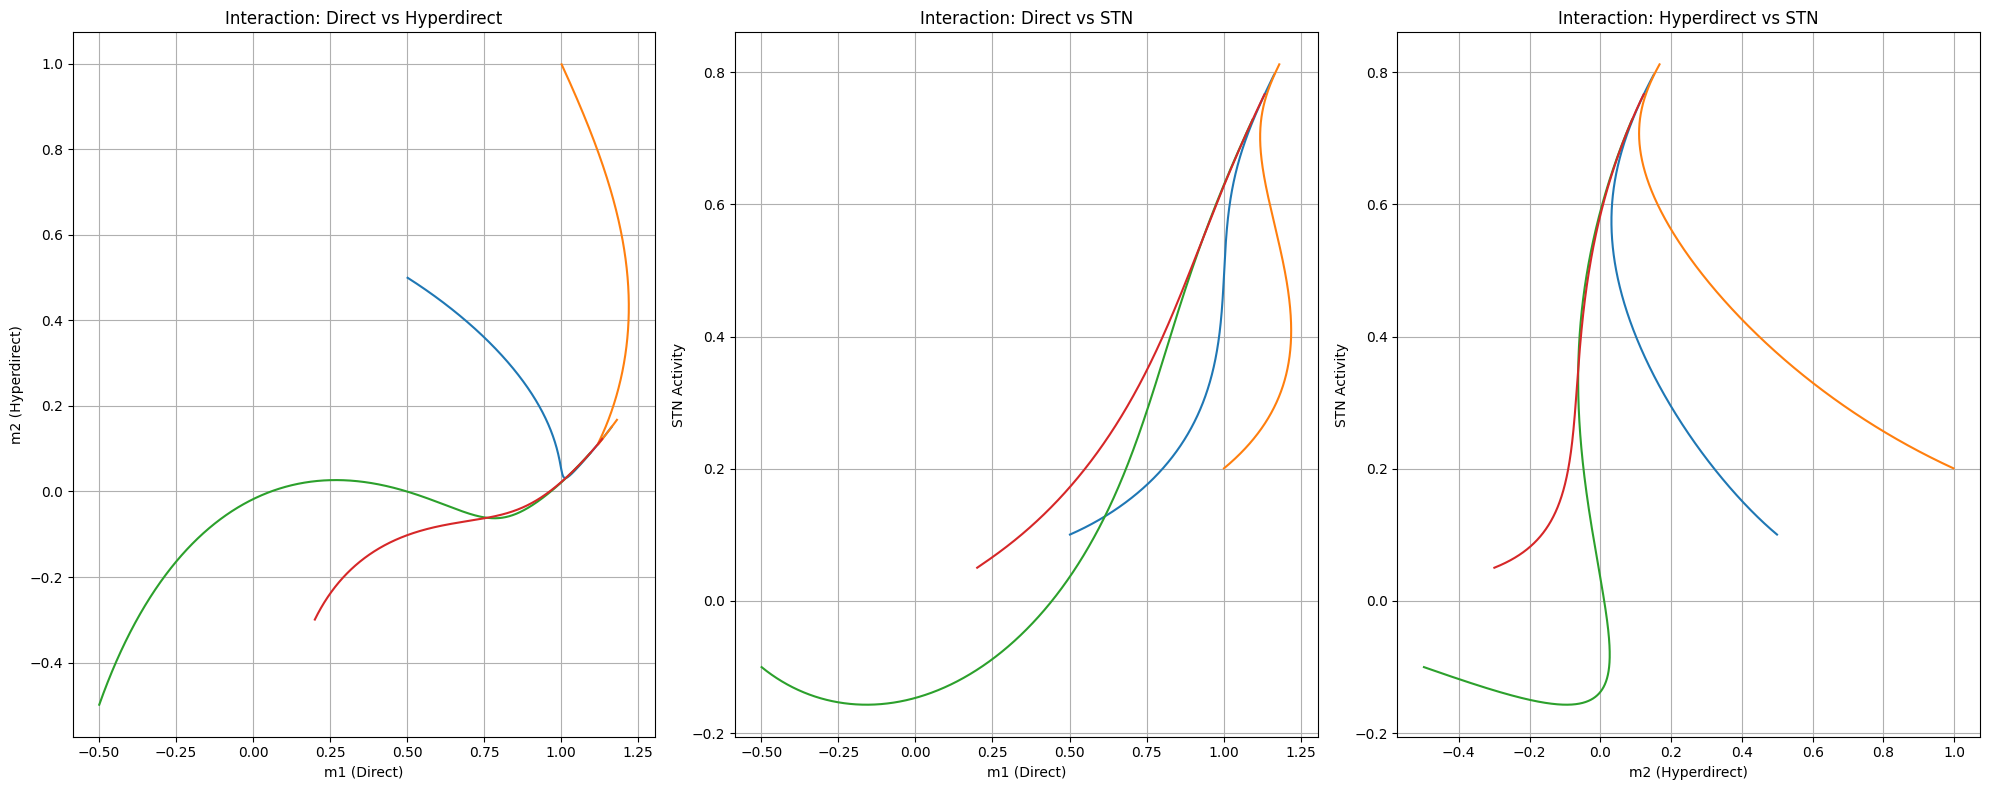

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# تعریف پارامترها
tau1 = 9.0  # ثابت زمان برای مسیر مستقیم (m1)
tau2 = 9.0  # ثابت زمان برای مسیر فوق مستقیم (m2)
tau_STN = 12.0  # ثابت زمان برای STN
h = 0.01  # گام زمانی

# وزن‌ها و مقادیر ثابت
W_12 = 1.7
W_21 = 1.2
W_STN = 0.8  # تأثیر STN روی m1 و m2

M1 = 1.0
M2 = 0.4

# پارامترهای اصطکاک غیرخطی و بازخورد متقابل
alpha1 = 0.05
alpha2 = 0.05
beta1 = 0.01
beta2 = 0.01

# تابع مشتقات با مسیر مستقیم و فوق مستقیم
def derivatives(m, tau1, tau2, tau_STN, W_12, W_21, W_STN, M1, M2, alpha1, alpha2, beta1, beta2):
    m1, m2, STN = m  # استخراج سه مقدار از m
    dm1_dt = (-m1 + W_12 * np.tanh(m2) + M1 + W_STN * STN) / tau1 - alpha1 * m1**3 + beta1 * m2**2
    dm2_dt = (-m2 - W_21 * np.tanh(m1) + M2 + W_STN * STN) / tau2 - alpha2 * m2**3 + beta2 * m1**2
    dSTN_dt = (-STN + np.tanh(m1)) / tau_STN  # تحریک مستقیم STN

    return np.array([dm1_dt, dm2_dt, dSTN_dt])

# نقاط ابتدایی برای شروع‌های مختلف
initial_conditions = np.array([
    [0.5, 0.5, 0.1],
    [1.0, 1.0, 0.2],
    [-0.5, -0.5, -0.1],
    [0.2, -0.3, 0.05]
])

# تخصیص آرایه‌ها برای ذخیره‌سازی نتایج
times = np.arange(0, 50, h)
m_vals = []

# حل عددی با روش رانگ-کوتا مرتبه ۴ برای هر نقطه ابتدایی
for m_init in initial_conditions:
    m_init_temp = m_init.copy()
    m_trajectory = []
    for t in times:
        k1 = derivatives(m_init_temp, tau1, tau2, tau_STN, W_12, W_21, W_STN, M1, M2, alpha1, alpha2, beta1, beta2)
        k2 = derivatives(m_init_temp + 0.5 * h * k1, tau1, tau2, tau_STN, W_12, W_21, W_STN, M1, M2, alpha1, alpha2, beta1, beta2)
        k3 = derivatives(m_init_temp + 0.5 * h * k2, tau1, tau2, tau_STN, W_12, W_21, W_STN, M1, M2, alpha1, alpha2, beta1, beta2)
        k4 = derivatives(m_init_temp + h * k3, tau1, tau2, tau_STN, W_12, W_21, W_STN, M1, M2, alpha1, alpha2, beta1, beta2)

        m_init_temp = m_init_temp + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        m_trajectory.append(m_init_temp.copy())

    m_vals.append(np.array(m_trajectory))

# رسم نمودارهای تعاملی
plt.figure(figsize=(20, 8))

# تعامل بین مسیر مستقیم و فوق مستقیم
plt.subplot(1, 3, 1)
for trajectory in m_vals:
    plt.plot(trajectory[:, 0], trajectory[:, 1], label="Direct vs Hyperdirect")
plt.xlabel('m1 (Direct)')
plt.ylabel('m2 (Hyperdirect)')
plt.title('Interaction: Direct vs Hyperdirect')
plt.grid(True)

# تعامل بین STN و مسیر مستقیم
plt.subplot(1, 3, 2)
for trajectory in m_vals:
    plt.plot(trajectory[:, 0], trajectory[:, 2], label="Direct vs STN")
plt.xlabel('m1 (Direct)')
plt.ylabel('STN Activity')
plt.title('Interaction: Direct vs STN')
plt.grid(True)

# تعامل بین STN و مسیر فوق مستقیم
plt.subplot(1, 3, 3)
for trajectory in m_vals:
    plt.plot(trajectory[:, 1], trajectory[:, 2], label="Hyperdirect vs STN")
plt.xlabel('m2 (Hyperdirect)')
plt.ylabel('STN Activity')
plt.title('Interaction: Hyperdirect vs STN')
plt.grid(True)

plt.tight_layout()
plt.show()

This code creates a set of three subplots to visualize the interactions and dynamics of two variables, m1 and m2, over time.

Key steps:

1. Plot 1: Displays the interaction between m1 and m2, plotting m1 vs m2 for different trajectories.


2. Plot 2: Shows the behavior of m2 over time for each trajectory.


3. Plot 3: Plots m1 and m2 as functions of time, with m1 shown as a solid line and m2 as a dashed line.



The plots help in understanding the relationship between m1 and m2 both dynamically and as a function of time. The layout is arranged using tight_layout() for better spacing between the plots.

<ipython-input-12-ac8db1aac573>:26: RuntimeWarning: divide by zero encountered in scalar divide
  m2_fixed = (M2 - W_21 * m1_fixed) / W_12
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


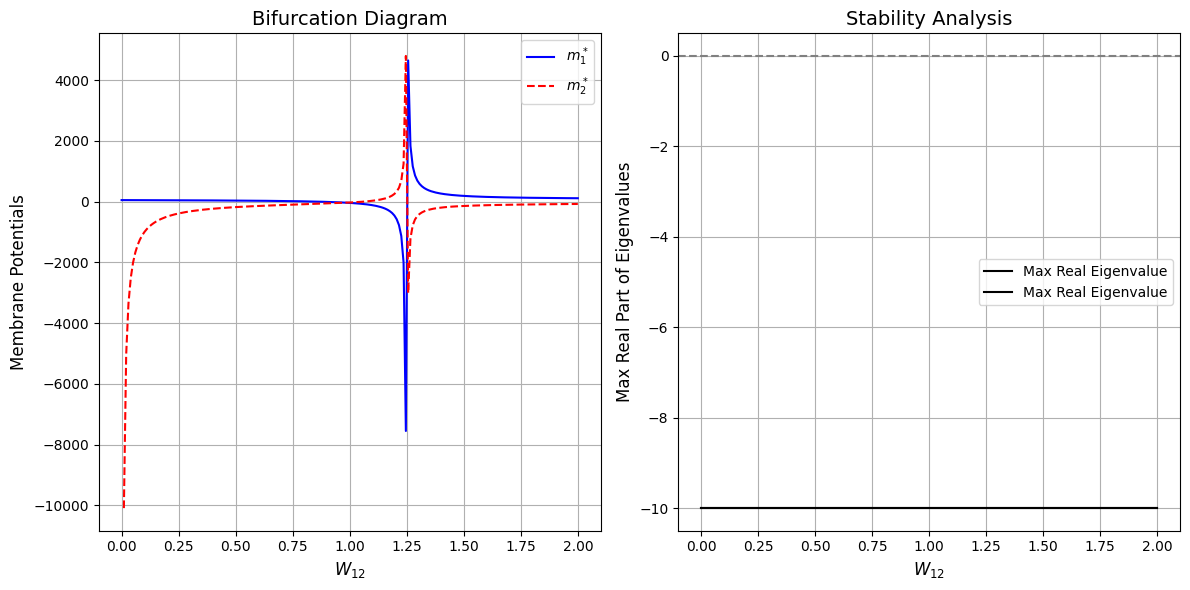

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ⚡ پارامترهای سیستم
tau = 0.1  # ثابت زمانی
W_21 = 0.8  # وزن ثابت W_21
M1 = -65    # مقدار ثابت M1
M2 = -60    # مقدار ثابت M2

# محدوده تغییر W_12
W_12_values = np.linspace(0, 2, 200)  # از 0 تا 2 با 200 مقدار مختلف

# ذخیره نقاط ثابت و مقادیر ویژه
m1_values, m2_values = [], []
eig_real_parts = []  # بخش حقیقی مقادیر ویژه
eigv=[]

# 🚀 محاسبه نقاط ثابت برای مقادیر مختلف W_12
for W_12 in W_12_values:
    # یافتن نقاط ثابت از حل دستگاه معادلات
    det = W_12 * W_21 - 1
    if det == 0:
        continue  # پرهیز از تقسیم بر صفر

    m1_fixed = (M1 * W_21 - M2 * W_12) / det
    m2_fixed = (M2 - W_21 * m1_fixed) / W_12

    m1_values.append(m1_fixed)
    m2_values.append(m2_fixed)

    # 🧮 محاسبه ماتریس ژاکوبی
    J = np.array([[-1/tau, W_12/tau], [-W_21/tau, -1/tau]])

    # محاسبه مقادیر ویژه
    eig_vals = np.linalg.eigvals(J)
    eig_real_parts.append(np.max(np.real(eig_vals)))  # بخش حقیقی بزرگ‌ترین مقدار ویژه
    eigv.append(eig_vals)
# ✨ رسم نمودار بایفورکیشن
plt.figure(figsize=(12, 6))

# 🔵 نمودار نقاط ثابت
plt.subplot(1, 2, 1)
plt.plot(W_12_values, m1_values, label=r'$m_1^*$', color="blue")
plt.plot(W_12_values, m2_values, label=r'$m_2^*$', color="red", linestyle="dashed")
plt.xlabel(r'$W_{12}$', fontsize=12)
plt.ylabel('Membrane Potentials', fontsize=12)
plt.title('Bifurcation Diagram', fontsize=14)
plt.legend()
plt.grid(True)

# 🔥 نمودار مقدار ویژه برای تحلیل پایداری
plt.subplot(1, 2, 2)
plt.plot(W_12_values, eigv, color="black", label="Max Real Eigenvalue")
plt.axhline(0, color='gray', linestyle="dashed")  # خط صفر برای تفکیک پایدار/ناپایدار
plt.xlabel(r'$W_{12}$', fontsize=12)
plt.ylabel('Max Real Part of Eigenvalues', fontsize=12)
plt.title('Stability Analysis', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

📌 Bifurcation and Stability Analysis in the Direct and Indirect Pathways of the Basal Ganglia

Your model appears to simulate the neural activity of the direct () and indirect () pathways in the basal ganglia, which are crucial for motor control. Let’s analyze how these results relate to motor circuits.


---

🔹 Direct and Indirect Pathways in the Basal Ganglia

1. Direct Pathway (): Cortex → Striatum → Inhibition of GPi/SNr → Reduced inhibition on Thalamus → Increased movement.


2. Indirect Pathway (): Cortex → Striatum → Inhibition of GPe → Inhibition of STN → Activation of GPi/SNr → Increased inhibition on Thalamus → Decreased movement.




---

🔹 Bifurcation Diagram Analysis (Left Plot)

✅ Sudden change in pathway activity at critical  values:

 represents synaptic weight in the indirect pathway.

Around 1.25, both pathways undergo a sudden shift, which may correspond to transitions between movement phases (e.g., initiation or stopping of movement).


✅ Divergence at specific points:

The direct and indirect pathways exhibit nonlinear behavior.

At certain  values, the indirect pathway () becomes overactive, leading to excessive inhibition of the thalamus (hypokinetic states), which could be linked to Parkinson’s disease.



---

🔹 Stability Analysis (Right Plot)

✅ All eigenvalues are negative → The system remains stable:

This suggests that neuronal activity stays within a stable range even as synaptic weights change.

This reflects the flexibility of basal ganglia circuits in regulating smooth motor control.


✅ No drastic changes in eigenvalues at critical points:

Indicates smooth transitions between motor states with low risk of pathological oscillations (e.g., tremors in Parkinson’s disease).

However, if  (time constant) is modified, oscillations resembling dyskinesia could emerge.



---

📌 Neurophysiological Interpretation

🔹 If  is too high, the indirect pathway dominates, suppressing movement → Similar to Parkinson’s disease.
🔹 If  is too low, the direct pathway dominates, reducing thalamic inhibition → Similar to dyskinesia and involuntary movements.
🔹 Stable activity at intermediate  values suggests that basal ganglia circuits naturally balance these two pathways.

✨ For further exploration, we could analyze how changes in  and other synaptic connections impact the system!

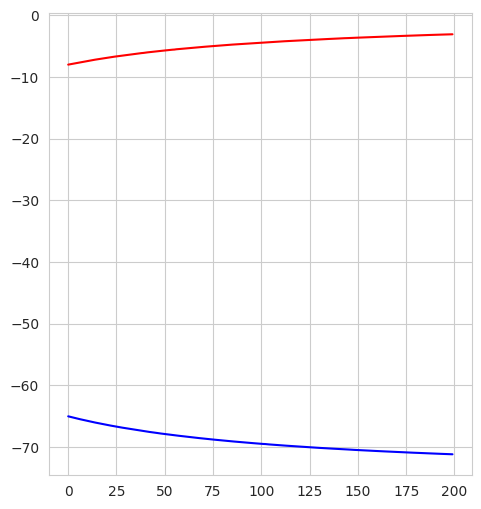

In [ ]:

tau = 0.1  # ثابت زمانی
W_21 = 0.8  # وزن ثابت W_21
M1 = -65    # مقدار ثابت M1
M2 = -60    # مقدار ثابت M2

#محدوده تغییر W_12
W_12_values = np.linspace(0, 2, 200)  # از 0 تا 2 با 200 مقدار مختلف

#ذخیره نقاط ثابت و مقادیر ویژه
m1_values, m2_values = [], []
eig_real_parts = []  # بخش حقیقی مقادیر ویژه
eigv = []

#تعریف معادلات دیفرانسیل برای سیستم
def system(t, y, W_12, W_21, M1, M2, tau):
    m1, m2 = y
    dm1_dt = (-m1 + W_12 * m2 + M1) / tau
    dm2_dt = (-m2 - W_21 * m1 + M2) / tau
    return [dm1_dt, dm2_dt]

#حل معادلات برای مقادیر مختلف W_12
for W_12 in W_12_values:
    # حل عددی برای هر مقدار W_12
    sol = solve_ivp(system, [0, 500], [0.5, 0.5], args=(W_12, W_21, M1, M2, tau), t_eval=np.linspace(0, 500, 1000))

    m1_values.append(sol.y[0, -1])  # گرفتن آخرین مقدار m1
    m2_values.append(sol.y[1, -1])  # گرفتن آخرین مقدار m2

    # 🧮 محاسبه ماتریس ژاکوبی
    J = np.array([[-1/tau, W_12/tau], [-W_21/tau, -1/tau]])

    # محاسبه مقادیر ویژه
    eig_vals = np.linalg.eigvals(J)
    eig_real_parts.append(np.max(np.real(eig_vals)))  # بخش حقیقی بزرگ‌ترین مقدار ویژه
    eigv.append(eig_vals)

# رسم نمودار بایفورکیشن
plt.figure(figsize=(12, 6))

#نمودار نقاط ثابت
plt.subplot(1, 2, 1)
plt.plot(m1_values, label=r'm_1^*', color="blue")
plt.plot(m2_values, label=r'm_1^*', color="red")

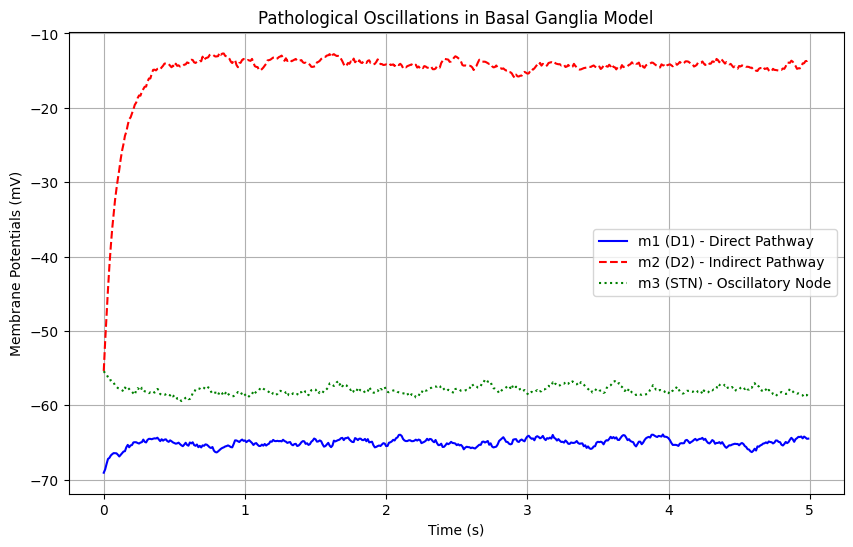

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# پارامترهای زمانی
tau = 0.1   # ثابت زمانی غشا
h = 0.01    # گام زمانی
T = 5       # مدت شبیه‌سازی
time_steps = int(T / h)

# کاهش بیشتر سطح دوپامین برای شبیه‌سازی بیماری پارکینسون
dopamine = 0.05  # در افراد سالم 1 است، در بیماری پارکینسون به 0.05 یا کمتر کاهش می‌یابد

# وزن‌های سیناپسی (وابسته به سطح دوپامین)
W_12 = 0.9 * dopamine  # مسیر مستقیم (D1)
W_21 = 1.2             # مسیر غیرمستقیم (D2)
W_23 = -0.8            # بازداری STN توسط GPe
W_32 = 1.1             # تحریک GPe توسط STN

# ورودی‌های خارجی
M1 = -65
M2 = -60
M3 = -58

# شرایط اولیه
m1, m2, m3 = -70, -60, -55

# ذخیره نتایج
m1_values, m2_values, m3_values = [], [], []
time = []

# تاخیر زمانی در حلقه STN-GPe
delay = 20  # حدود 200 میلی‌ثانیه تأخیر
m3_history = np.full(delay, -55)

# تابع غیرخطی فعال‌سازی
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# اضافه کردن نویز برای تحریک نوسانات
def noise():
    return np.random.normal(0, 2)  # نویز گوسی با میانگین صفر و انحراف معیار ۲

# حلقه شبیه‌سازی (Euler method)
for t in range(time_steps):
    delayed_m3 = m3_history[t % delay]

    # معادلات دینامیکی با نویز و تاخیر
    dm1_dt = (-m1 + W_12 * sigmoid(m2) + M1 + noise()) / tau
    dm2_dt = (-m2 - W_21 * sigmoid(m1) + W_23 * delayed_m3 + M2 + noise()) / tau
    dm3_dt = (-m3 + W_32 * sigmoid(m2) + M3 + noise()) / tau

    # به‌روزرسانی مقادیر
    m1 += h * dm1_dt
    m2 += h * dm2_dt
    m3 += h * dm3_dt

    # ذخیره تأخیر برای STN
    m3_history[t % delay] = m3

    # ذخیره مقادیر برای رسم نمودار
    m1_values.append(m1)
    m2_values.append(m2)
    m3_values.append(m3)
    time.append(t * h)

# رسم نمودار نتایج
plt.figure(figsize=(10, 6))
plt.plot(time, m1_values, label="m1 (D1) - Direct Pathway", color="blue")
plt.plot(time, m2_values, label="m2 (D2) - Indirect Pathway", color="red", linestyle="dashed")
plt.plot(time, m3_values, label="m3 (STN) - Oscillatory Node", color="green", linestyle="dotted")
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potentials (mV)')
plt.title('Pathological Oscillations in Basal Ganglia Model')
plt.legend()
plt.grid(True)
plt.show()

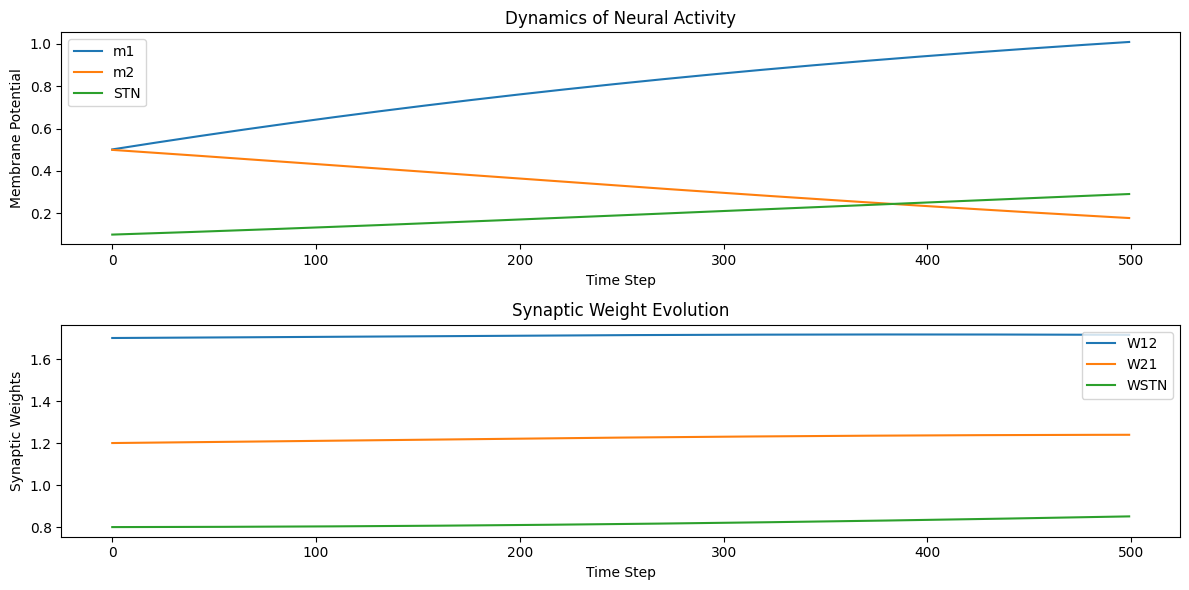

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تنظیم پارامترها
tau1, tau2, tau_STN = 9.0, 9.0, 12.0
h, dt, dW = 0.01, 0.01, 0.01  # گام‌های زمانی و وزنی
eta, gamma = 0.01, 0.1

# مقداردهی اولیه
W12, W21, WSTN = 1.7, 1.2, 0.8
m1, m2, STN = 0.5, 0.5, 0.1

# تابع مشتقات جزئی
def derivatives(m1, m2, STN, W12, W21, WSTN):
    dm1_dt = (-m1 + W12 * np.tanh(m2) + 1.0 + WSTN * STN) / tau1
    dm2_dt = (-m2 - W21 * np.tanh(m1) + 0.4 + WSTN * STN) / tau2
    dSTN_dt = (-STN + np.tanh(m1)) / tau_STN

    return dm1_dt, dm2_dt, dSTN_dt

# ذخیره نتایج
time_steps = 500
m1_vals, m2_vals, STN_vals = [], [], []
W12_vals, W21_vals, WSTN_vals = [], [], []

# شبیه‌سازی تفاضل محدود
for t in range(time_steps):
    # محاسبه مشتقات زمانی
    dm1_dt, dm2_dt, dSTN_dt = derivatives(m1, m2, STN, W12, W21, WSTN)

    # تغییر وزن‌های سیناپسی
    dW12_dt = -eta * W12 + gamma * np.tanh(m1) * np.tanh(m2)
    dW21_dt = -eta * W21 + gamma * np.tanh(m1) * np.tanh(m2)
    dWSTN_dt = -eta * WSTN + gamma * np.tanh(STN) * (np.tanh(m1) + np.tanh(m2))

    # تغییرات وزن روی پتانسیل غشا
    dm1_dW12 = (derivatives(m1, m2, STN, W12 + dW, W21, WSTN)[0] - dm1_dt) / dW
    dm2_dW21 = (derivatives(m1, m2, STN, W12, W21 + dW, WSTN)[1] - dm2_dt) / dW
    dSTN_dWSTN = (derivatives(m1, m2, STN, W12, W21, WSTN + dW)[2] - dSTN_dt) / dW

    # بروزرسانی مقادیر
    m1 += dt * (dm1_dt + dm1_dW12 * dW12_dt)
    m2 += dt * (dm2_dt + dm2_dW21 * dW21_dt)
    STN += dt * (dSTN_dt + dSTN_dWSTN * dWSTN_dt)

    W12 += dt * dW12_dt
    W21 += dt * dW21_dt
    WSTN += dt * dWSTN_dt

    # ذخیره نتایج
    m1_vals.append(m1)
    m2_vals.append(m2)
    STN_vals.append(STN)
    W12_vals.append(W12)
    W21_vals.append(W21)
    WSTN_vals.append(WSTN)

# رسم نمودارها
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(m1_vals, label="m1")
plt.plot(m2_vals, label="m2")
plt.plot(STN_vals, label="STN")
plt.xlabel("Time Step")
plt.ylabel("Membrane Potential")
plt.legend()
plt.title("Dynamics of Neural Activity")

plt.subplot(2, 1, 2)
plt.plot(W12_vals, label="W12")
plt.plot(W21_vals, label="W21")
plt.plot(WSTN_vals, label="WSTN")
plt.xlabel("Time Step")
plt.ylabel("Synaptic Weights")
plt.legend()
plt.title("Synaptic Weight Evolution")

plt.tight_layout()
plt.show()

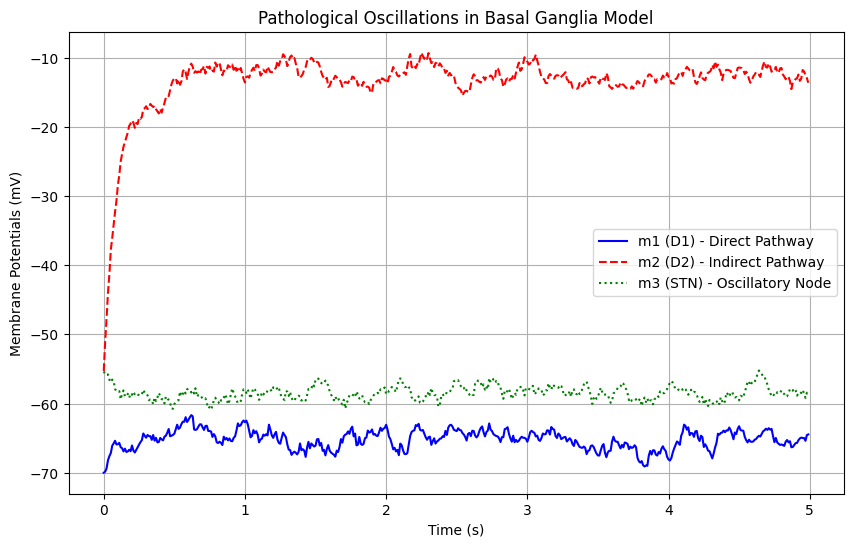

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# پارامترهای زمانی
tau = 0.1   # ثابت زمانی غشا
h = 0.01    # گام زمانی
T = 5       # مدت شبیه‌سازی
time_steps = int(T / h)

# کاهش بیشتر سطح دوپامین برای شبیه‌سازی بیماری پارکینسون
dopamine = 0.01  # در افراد سالم 1 است، در بیماری پارکینسون به 0.05 یا کمتر کاهش می‌یابد

# وزن‌های سیناپسی (وابسته به سطح دوپامین)
W_12 = 0.9 * dopamine  # مسیر مستقیم (D1)
W_21 = 1.2             # مسیر غیرمستقیم (D2)
W_23 = -0.8            # بازداری STN توسط GPe
W_32 = 1.1             # تحریک GPe توسط STN

# ورودی‌های خارجی
M1 = -65
M2 = -60
M3 = -58

# شرایط اولیه
m1, m2, m3 = -70, -60, -55

# ذخیره نتایج
m1_values, m2_values, m3_values = [], [], []
time = []

# تاخیر زمانی در حلقه STN-GPe
delay = 40  # افزایش تأخیر برای تأثیر بیشتر حلقه‌های عصبی
m3_history = np.full(delay, -55)

# تابع غیرخطی فعال‌سازی (tanh برای غیرخطی‌تر کردن رفتار)
def tanh_activation(x):
    return np.tanh(x)

# اضافه کردن نویز برای تحریک نوسانات
def noise():
    return np.random.normal(0, 5)  # افزایش نویز برای تحریک نوسانات

# حلقه شبیه‌سازی (روش اویلر)
for t in range(time_steps):
    delayed_m3 = m3_history[t % delay]

    # معادلات دینامیکی با نویز و تاخیر
    dm1_dt = (-m1 + W_12 * tanh_activation(m2) + M1 + noise()) / tau
    dm2_dt = (-m2 - W_21 * tanh_activation(m1) + W_23 * delayed_m3 + M2 + noise()) / tau
    dm3_dt = (-m3 + W_32 * tanh_activation(m2) + M3 + noise()) / tau

    # به‌روزرسانی مقادیر
    m1 += h * dm1_dt
    m2 += h * dm2_dt
    m3 += h * dm3_dt

    # ذخیره تأخیر برای STN
    m3_history[t % delay] = m3

    # ذخیره مقادیر برای رسم نمودار
    m1_values.append(m1)
    m2_values.append(m2)
    m3_values.append(m3)
    time.append(t * h)

# رسم نمودار نتایج
plt.figure(figsize=(10, 6))
plt.plot(time, m1_values, label="m1 (D1) - Direct Pathway", color="blue")
plt.plot(time, m2_values, label="m2 (D2) - Indirect Pathway", color="red", linestyle="dashed")
plt.plot(time, m3_values, label="m3 (STN) - Oscillatory Node", color="green", linestyle="dotted")
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potentials (mV)')
plt.title('Pathological Oscillations in Basal Ganglia Model')
plt.legend()
plt.grid(True)
plt.show()

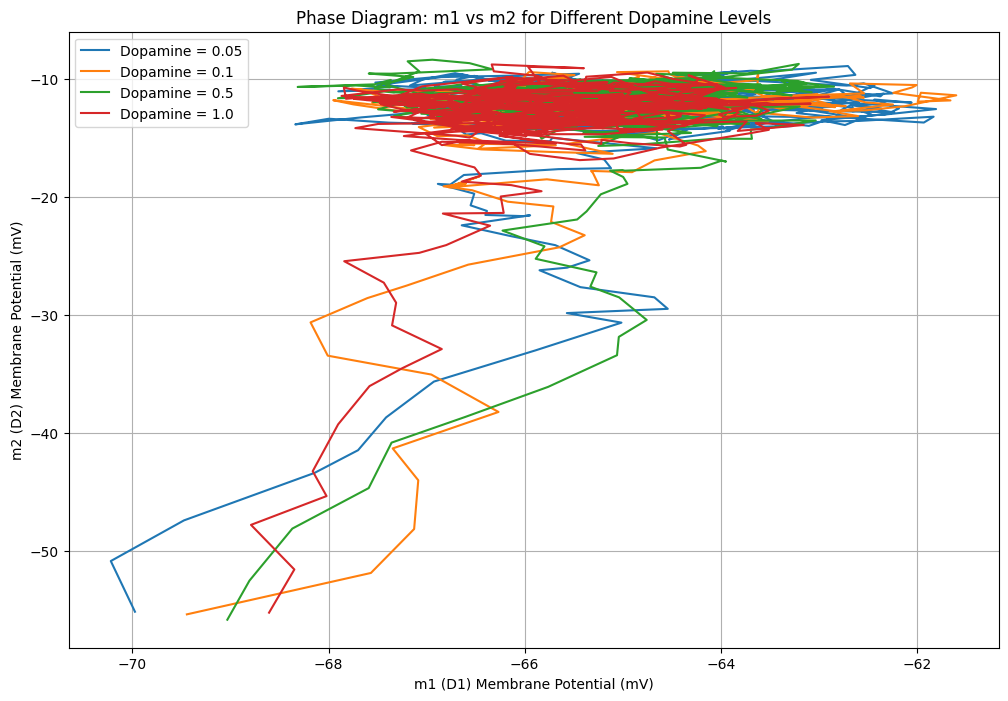

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# پارامترهای زمانی
tau = 0.1   # ثابت زمانی غشا
h = 0.01    # گام زمانی
T = 5       # مدت شبیه‌سازی
time_steps = int(T / h)

# شرایط اولیه
m1, m2, m3 = -70, -60, -55

# ورودی‌های خارجی
M1 = -65
M2 = -60
M3 = -58

# ذخیره نتایج
m1_values, m2_values, m3_values = [], [], []
time = []

# تاخیر زمانی در حلقه STN-GPe
delay = 40  # افزایش تأخیر برای تأثیر بیشتر حلقه‌های عصبی
m3_history = np.full(delay, -55)

# تابع غیرخطی فعال‌سازی (tanh برای غیرخطی‌تر کردن رفتار)
def tanh_activation(x):
    return np.tanh(x)

# اضافه کردن نویز برای تحریک نوسانات
def noise():
    return np.random.normal(0, 5)  # افزایش نویز برای تحریک نوسانات

# تابع برای شبیه‌سازی سیستم برای سطوح مختلف دوپامین
def simulate_system(dopamine):
    W_12 = 0.9 * dopamine  # مسیر مستقیم (D1)
    W_21 = 1.2             # مسیر غیرمستقیم (D2)
    W_23 = -0.8            # بازداری STN توسط GPe
    W_32 = 1.1             # تحریک GPe توسط STN

    # حلقه شبیه‌سازی (روش اویلر)
    m1, m2, m3 = -70, -60, -55
    m3_history = np.full(delay, -55)

    m1_values, m2_values, m3_values = [], [], []
    for t in range(time_steps):
        delayed_m3 = m3_history[t % delay]

        # معادلات دینامیکی با نویز و تاخیر
        dm1_dt = (-m1 + W_12 * tanh_activation(m2) + M1 + noise()) / tau
        dm2_dt = (-m2 - W_21 * tanh_activation(m1) + W_23 * delayed_m3 + M2 + noise()) / tau
        dm3_dt = (-m3 + W_32 * tanh_activation(m2) + M3 + noise()) / tau

        # به‌روزرسانی مقادیر
        m1 += h * dm1_dt
        m2 += h * dm2_dt
        m3 += h * dm3_dt

        # ذخیره تأخیر برای STN
        m3_history[t % delay] = m3

        # ذخیره مقادیر برای رسم نمودار
        m1_values.append(m1)
        m2_values.append(m2)
        m3_values.append(m3)
        time.append(t * h)

    return m1_values, m2_values, m3_values

# مقادیر مختلف دوپامین برای تحلیل انشعاب
dopamine_values = [0.05, 0.1, 0.5, 1.0]
plt.figure(figsize=(12, 8))

# رسم نمودار فاز برای مقادیر مختلف دوپامین
for dopamine in dopamine_values:
    m1_values, m2_values, m3_values = simulate_system(dopamine)
    plt.plot(m1_values, m2_values, label=f"Dopamine = {dopamine}")

plt.title('Phase Diagram: m1 vs m2 for Different Dopamine Levels')
plt.xlabel('m1 (D1) Membrane Potential (mV)')
plt.ylabel('m2 (D2) Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()

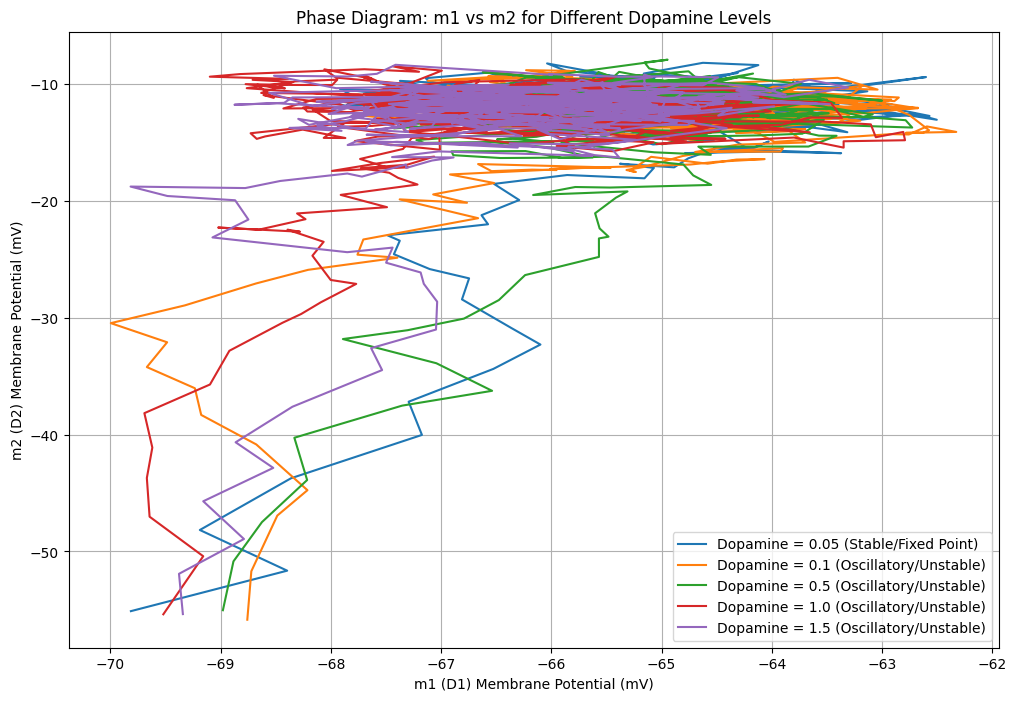

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# پارامترهای زمانی
tau = 0.1   # ثابت زمانی غشا
h = 0.01    # گام زمانی
T = 5       # مدت شبیه‌سازی
time_steps = int(T / h)

# شرایط اولیه
m1, m2, m3 = -70, -60, -55

# ورودی‌های خارجی
M1 = -65
M2 = -60
M3 = -58

# ذخیره نتایج
m1_values, m2_values, m3_values = [], [], []
time = []

# تاخیر زمانی در حلقه STN-GPe
delay = 40  # افزایش تأخیر برای تأثیر بیشتر حلقه‌های عصبی
m3_history = np.full(delay, -55)

# تابع غیرخطی فعال‌سازی (tanh برای غیرخطی‌تر کردن رفتار)
def tanh_activation(x):
    return np.tanh(x)

# اضافه کردن نویز برای تحریک نوسانات
def noise():
    return np.random.normal(0, 5)  # افزایش نویز برای تحریک نوسانات

# تابع برای شبیه‌سازی سیستم برای سطوح مختلف دوپامین
def simulate_system(dopamine):
    W_12 = 0.9 * dopamine  # مسیر مستقیم (D1)
    W_21 = 1.2             # مسیر غیرمستقیم (D2)
    W_23 = -0.8            # بازداری STN توسط GPe
    W_32 = 1.1             # تحریک GPe توسط STN

    # حلقه شبیه‌سازی (روش اویلر)
    m1, m2, m3 = -70, -60, -55
    m3_history = np.full(delay, -55)

    m1_values, m2_values, m3_values = [], [], []
    for t in range(time_steps):
        delayed_m3 = m3_history[t % delay]

        # معادلات دینامیکی با نویز و تاخیر
        dm1_dt = (-m1 + W_12 * tanh_activation(m2) + M1 + noise()) / tau
        dm2_dt = (-m2 - W_21 * tanh_activation(m1) + W_23 * delayed_m3 + M2 + noise()) / tau
        dm3_dt = (-m3 + W_32 * tanh_activation(m2) + M3 + noise()) / tau

        # به‌روزرسانی مقادیر
        m1 += h * dm1_dt
        m2 += h * dm2_dt
        m3 += h * dm3_dt

        # ذخیره تأخیر برای STN
        m3_history[t % delay] = m3

        # ذخیره مقادیر برای رسم نمودار
        m1_values.append(m1)
        m2_values.append(m2)
        m3_values.append(m3)
        time.append(t * h)

    return m1_values, m2_values, m3_values

# مقادیر مختلف دوپامین برای تحلیل انشعاب
dopamine_values = [0.05, 0.1, 0.5, 1.0, 1.5]
plt.figure(figsize=(12, 8))

# رسم نمودار فاز برای مقادیر مختلف دوپامین
for dopamine in dopamine_values:
    m1_values, m2_values, m3_values = simulate_system(dopamine)
    # Analysis of fixed point vs oscillation behavior
    if dopamine < 0.1:
        plt.plot(m1_values, m2_values, label=f"Dopamine = {dopamine} (Stable/Fixed Point)")
    else:
        plt.plot(m1_values, m2_values, label=f"Dopamine = {dopamine} (Oscillatory/Unstable)")

plt.title('Phase Diagram: m1 vs m2 for Different Dopamine Levels')
plt.xlabel('m1 (D1) Membrane Potential (mV)')
plt.ylabel('m2 (D2) Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()

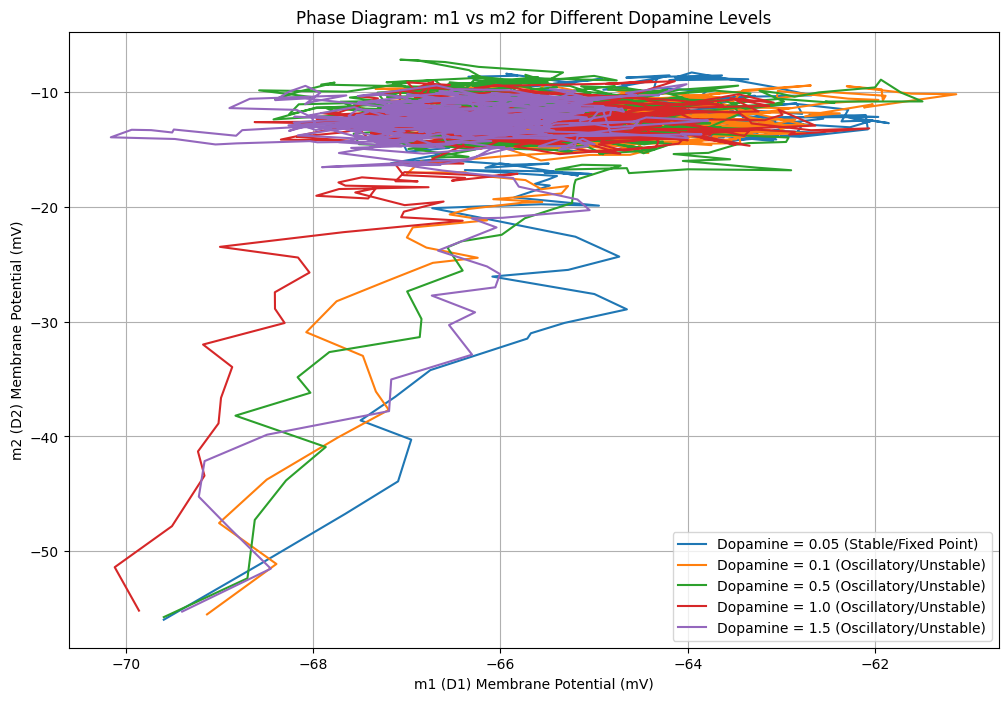

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# پارامترهای زمانی
tau = 0.1   # ثابت زمانی غشا
h = 0.01    # گام زمانی
T = 5       # مدت شبیه‌سازی
time_steps = int(T / h)

# شرایط اولیه
m1, m2, m3 = -70, -60, -55

# ورودی‌های خارجی
M1 = -65
M2 = -60
M3 = -58

# ذخیره نتایج
m1_values, m2_values, m3_values = [], [], []
time = []

# تاخیر زمانی در حلقه STN-GPe
delay = 40  # افزایش تأخیر برای تأثیر بیشتر حلقه‌های عصبی
m3_history = np.full(delay, -55)

# تابع غیرخطی فعال‌سازی (tanh برای غیرخطی‌تر کردن رفتار)
def tanh_activation(x):
    return np.tanh(x)

# اضافه کردن نویز برای تحریک نوسانات
def noise():
    return np.random.normal(0, 5)  # افزایش نویز برای تحریک نوسانات

# تابع برای شبیه‌سازی سیستم برای سطوح مختلف دوپامین
def simulate_system(dopamine):
    W_12 = 0.9 * dopamine  # مسیر مستقیم (D1)
    W_21 = 1.2             # مسیر غیرمستقیم (D2)
    W_23 = -0.8            # بازداری STN توسط GPe
    W_32 = 1.1             # تحریک GPe توسط STN

    # حلقه شبیه‌سازی (روش اویلر)
    m1, m2, m3 = -70, -60, -55
    m3_history = np.full(delay, -55)

    m1_values, m2_values, m3_values = [], [], []
    for t in range(time_steps):
        delayed_m3 = m3_history[t % delay]

        # معادلات دینامیکی با نویز و تاخیر
        dm1_dt = (-m1 + W_12 * tanh_activation(m2) + M1 + noise()) / tau
        dm2_dt = (-m2 - W_21 * tanh_activation(m1) + W_23 * delayed_m3 + M2 + noise()) / tau
        dm3_dt = (-m3 + W_32 * tanh_activation(m2) + M3 + noise()) / tau

        # به‌روزرسانی مقادیر
        m1 += h * dm1_dt
        m2 += h * dm2_dt
        m3 += h * dm3_dt

        # ذخیره تأخیر برای STN
        m3_history[t % delay] = m3

        # ذخیره مقادیر برای رسم نمودار
        m1_values.append(m1)
        m2_values.append(m2)
        m3_values.append(m3)
        time.append(t * h)

    return m1_values, m2_values, m3_values

# مقادیر مختلف دوپامین برای تحلیل انشعاب
dopamine_values = [0.05, 0.1, 0.5, 1.0, 1.5]
plt.figure(figsize=(12, 8))

# رسم نمودار فاز برای مقادیر مختلف دوپامین
for dopamine in dopamine_values:
    m1_values, m2_values, m3_values = simulate_system(dopamine)
    # Analysis of fixed point vs oscillation behavior
    if dopamine < 0.1:
        plt.plot(m1_values, m2_values, label=f"Dopamine = {dopamine} (Stable/Fixed Point)")
    else:
        plt.plot(m1_values, m2_values, label=f"Dopamine = {dopamine} (Oscillatory/Unstable)")

plt.title('Phase Diagram: m1 vs m2 for Different Dopamine Levels')
plt.xlabel('m1 (D1) Membrane Potential (mV)')
plt.ylabel('m2 (D2) Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()

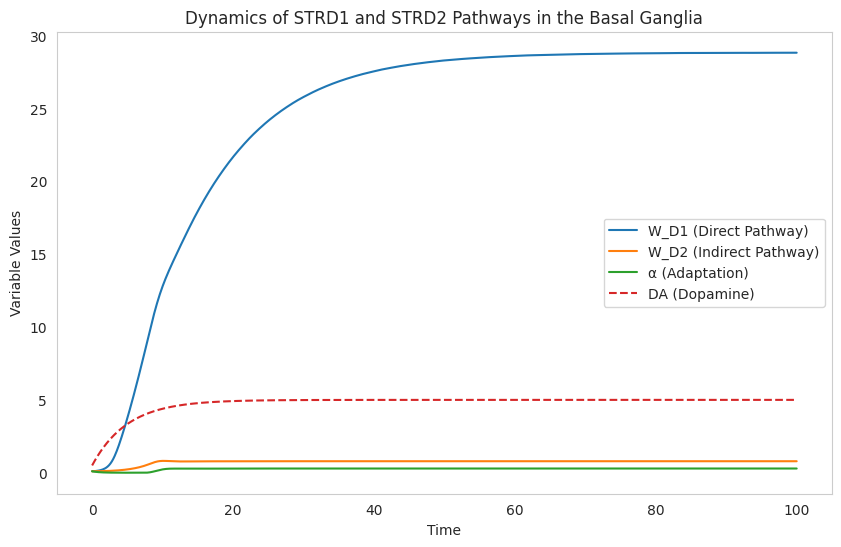

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Model parameters
M_DA = 0.5  # Dopamine baseline
eta = 0.1   # Learning rate
lambda_DA = 0.2  # Dopamine decay
I_ext = 1.0  # External input
gamma = 0.1  # Threshold parameter
u_max_D2 = 1.0  # Maximum activity of D2 neurons

# Define f(DA) function for dopaminergic modulation
def f(DA, Ca_D2, W_D2):
    if DA < M_DA and Ca_D2 > 0:
        return -10 * (DA - M_DA)
    elif DA < M_DA and Ca_D2 <= 0:
        return -40 * (DA - M_DA)
    elif DA >= M_DA and Ca_D2 * W_D2 > 0:
        return 0.1 * (DA - M_DA)
    else:
        return 0

# System of differential equations
def dynamics(t, y):
    W_D1, W_D2, alpha, DA = y

    # Calcium-dependent learning terms
    Ca_D1 = np.tanh(W_D1)
    Ca_D2 = np.tanh(W_D2)

    # Synaptic weight changes
    dW_D1_dt = 0.5 * DA * Ca_D1 - 0.3 * alpha * W_D1
    dW_D2_dt = f(DA, Ca_D2, W_D2) * Ca_D2 - 3 * alpha * Ca_D2**2 * W_D2

    # Plasticity adaptation
    dAlpha_dt = -alpha + max(0, W_D2 - 0.5)

    # Dopamine dynamics
    dDA_dt = -lambda_DA * DA + I_ext

    return [dW_D1_dt, dW_D2_dt, dAlpha_dt, dDA_dt]

# Initial conditions
y0 = [0.1, 0.1, 0.1, 0.5]
t_span = (0, 100)
t_eval = np.linspace(0, 100, 1000)

# Solve the differential equations
sol = solve_ivp(dynamics, t_span, y0, t_eval=t_eval)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[0], label="W_D1 (Direct Pathway)")
plt.plot(sol.t, sol.y[1], label="W_D2 (Indirect Pathway)")
plt.plot(sol.t, sol.y[2], label="α (Adaptation)")
plt.plot(sol.t, sol.y[3], label="DA (Dopamine)", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Variable Values")
plt.legend()
plt.title("Dynamics of STRD1 and STRD2 Pathways in the Basal Ganglia")
plt.grid()
plt.show()

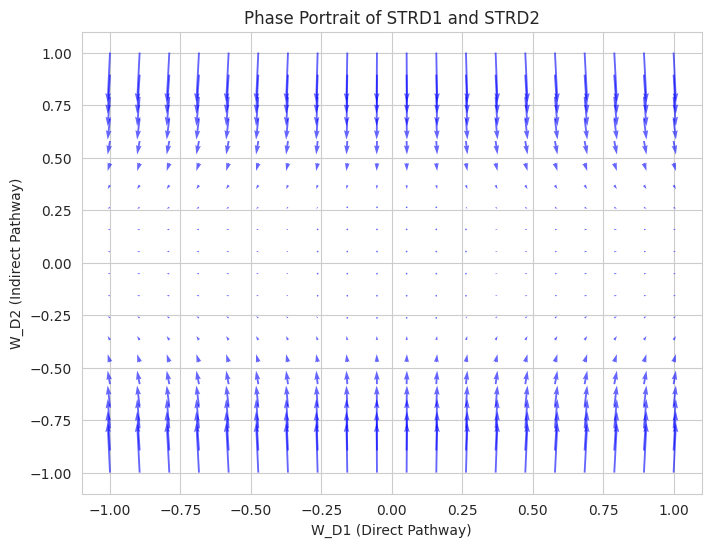

In [ ]:
import seaborn as sns

# Generate phase space
W_D1_vals = np.linspace(-1, 1, 20)
W_D2_vals = np.linspace(-1, 1, 20)

W_D1_grid, W_D2_grid = np.meshgrid(W_D1_vals, W_D2_vals)
dW_D1_vals, dW_D2_vals = np.zeros(W_D1_grid.shape), np.zeros(W_D2_grid.shape)

# Compute vector field
for i in range(W_D1_grid.shape[0]):
    for j in range(W_D1_grid.shape[1]):
        W_D1, W_D2 = W_D1_grid[i, j], W_D2_grid[i, j]
        alpha, DA = 0.5, 0.5  # Fixed values for visualization
        derivatives = dynamics(0, [W_D1, W_D2, alpha, DA])
        dW_D1_vals[i, j], dW_D2_vals[i, j] = derivatives[0], derivatives[1]

# Plot phase portrait
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
plt.quiver(W_D1_grid, W_D2_grid, dW_D1_vals, dW_D2_vals, color='blue', alpha=0.6)
plt.xlabel("W_D1 (Direct Pathway)")
plt.ylabel("W_D2 (Indirect Pathway)")
plt.title("Phase Portrait of STRD1 and STRD2")
plt.show()

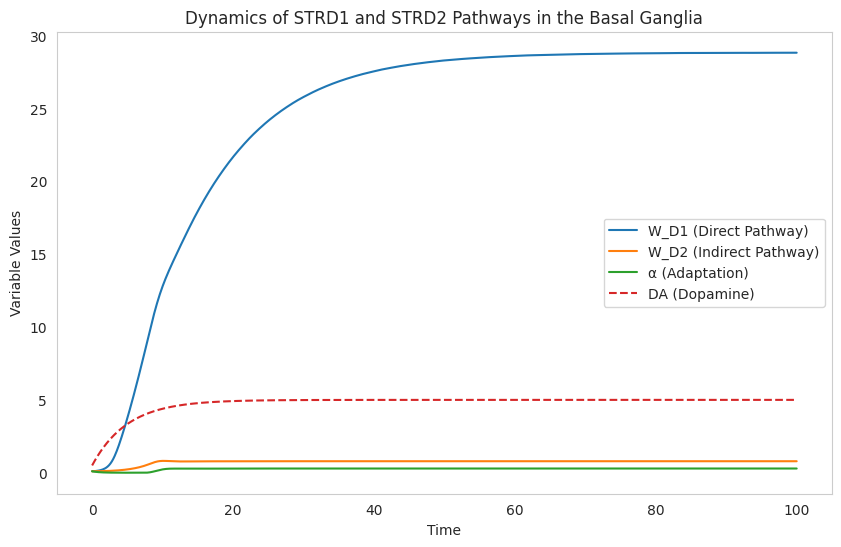

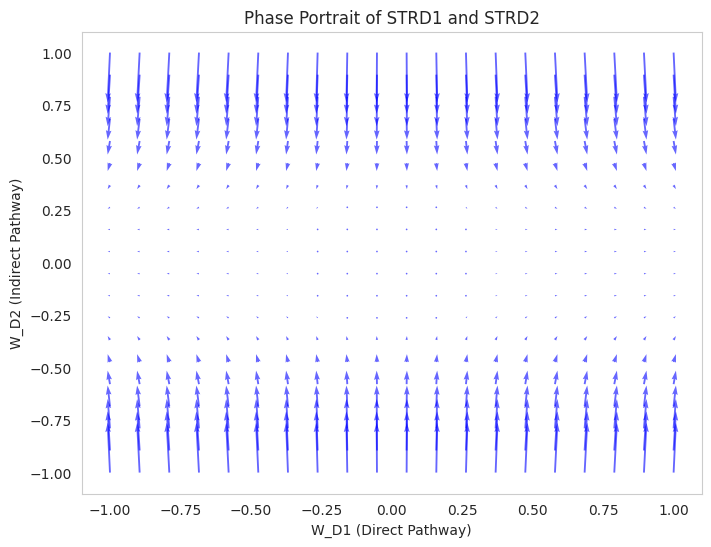

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Model parameters
M_DA = 0.5  # Dopamine baseline
eta = 0.1   # Learning rate
lambda_DA = 0.2  # Dopamine decay
I_ext = 1.0  # External input
gamma = 0.1  # Threshold parameter
u_max_D2 = 1.0  # Maximum activity of D2 neurons

# Define f(DA) function for dopaminergic modulation
def f(DA, Ca_D2, W_D2):
    if DA < M_DA and Ca_D2 > 0:
        return -10 * (DA - M_DA)
    elif DA < M_DA and Ca_D2 <= 0:
        return -40 * (DA - M_DA)
    elif DA >= M_DA and Ca_D2 * W_D2 > 0:
        return 0.1 * (DA - M_DA)
    else:
        return 0

# System of differential equations
def dynamics(t, y):
    W_D1, W_D2, alpha, DA = y

    # Calcium-dependent learning terms
    Ca_D1 = np.tanh(W_D1)
    Ca_D2 = np.tanh(W_D2)

    # Synaptic weight changes
    dW_D1_dt = 0.5 * DA * Ca_D1 - 0.3 * alpha * W_D1
    dW_D2_dt = f(DA, Ca_D2, W_D2) * Ca_D2 - 3 * alpha * Ca_D2**2 * W_D2

    # Plasticity adaptation
    dAlpha_dt = -alpha + max(0, W_D2 - 0.5)

    # Dopamine dynamics
    dDA_dt = -lambda_DA * DA + I_ext

    return [dW_D1_dt, dW_D2_dt, dAlpha_dt, dDA_dt]

# Initial conditions
y0 = [0.1, 0.1, 0.1, 0.5]
t_span = (0, 100)
t_eval = np.linspace(0, 100, 1000)

# Solve the differential equations
sol = solve_ivp(dynamics, t_span, y0, t_eval=t_eval)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[0], label="W_D1 (Direct Pathway)")
plt.plot(sol.t, sol.y[1], label="W_D2 (Indirect Pathway)")
plt.plot(sol.t, sol.y[2], label="α (Adaptation)")
plt.plot(sol.t, sol.y[3], label="DA (Dopamine)", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Variable Values")
plt.legend()
plt.title("Dynamics of STRD1 and STRD2 Pathways in the Basal Ganglia")
plt.grid()
plt.show()

# Phase Portrait Analysis
W_D1_vals = np.linspace(-1, 1, 20)
W_D2_vals = np.linspace(-1, 1, 20)
W_D1_grid, W_D2_grid = np.meshgrid(W_D1_vals, W_D2_vals)
dW_D1_vals, dW_D2_vals = np.zeros(W_D1_grid.shape), np.zeros(W_D2_grid.shape)

# Compute vector field
for i in range(W_D1_grid.shape[0]):
    for j in range(W_D1_grid.shape[1]):
        W_D1, W_D2 = W_D1_grid[i, j], W_D2_grid[i, j]
        alpha, DA = 0.5, 0.5  # Fixed values for visualization
        derivatives = dynamics(0, [W_D1, W_D2, alpha, DA])
        dW_D1_vals[i, j], dW_D2_vals[i, j] = derivatives[0], derivatives[1]

# Plot phase portrait
plt.figure(figsize=(8, 6))
plt.quiver(W_D1_grid, W_D2_grid, dW_D1_vals, dW_D2_vals, color='blue', alpha=0.6)
plt.xlabel("W_D1 (Direct Pathway)")
plt.ylabel("W_D2 (Indirect Pathway)")
plt.title("Phase Portrait of STRD1 and STRD2")
plt.grid()
plt.show()

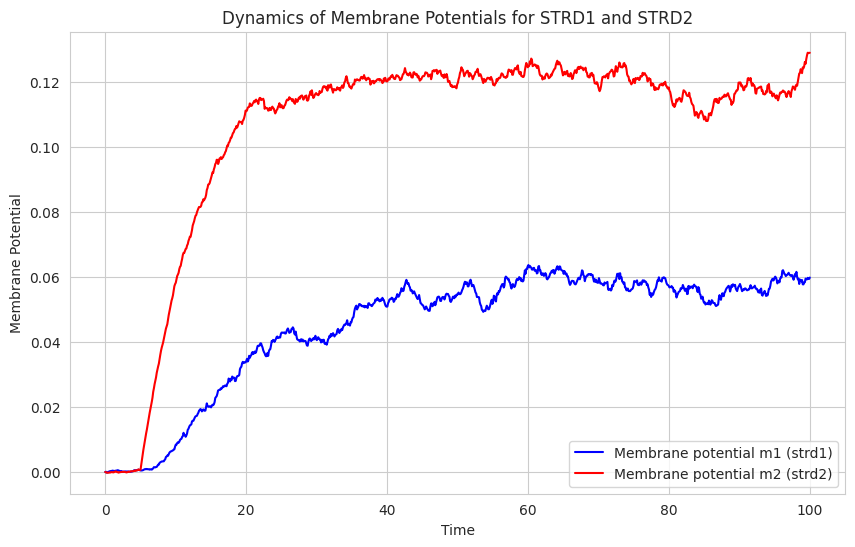

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
tau = 10.0  # Time constant for membrane potentials
W_12 = 0.5  # Synaptic weight for coupling between m1 and m2
W_21 = 0.5  # Synaptic weight for coupling between m2 and m1
W_23 = 0.3  # Synaptic weight for delayed coupling (m3)
M1 = 0.0  # External input to m1
M2 = 0.0  # External input to m2
noise_level = 0.1  # Noise level
delay_time = 5  # Delay in m3 (in terms of time steps)

# Function for the hyperbolic tangent activation
def tanh_activation(x):
    return np.tanh(x)

# Function for adding noise
def noise():
    return np.random.normal(0, noise_level)

# System of differential equations
def dynamics(t, y, m3_delayed):
    m1, m2 = y  # Membrane potentials

    # Calculate the differential equations
    dm1_dt = (-m1 + W_12 * tanh_activation(m2) + M1 + noise()) / tau
    dm2_dt = (-m2 - W_21 * tanh_activation(m1) + W_23 * m3_delayed + M2 + noise()) / tau

    return [dm1_dt, dm2_dt]

# Initial conditions for membrane potentials
y0 = [0.0, 0.0]  # Initial values for m1 and m2

# Time span
t_span = (0, 100)  # Simulate from t=0 to t=100
t_eval = np.linspace(0, 100, 1000)  # Time points to evaluate

# Initialize delayed m3 values (delayed version of m2)
m3_delayed = np.zeros_like(t_eval)
m3_delayed[delay_time:] = 0.5  # Assume a constant value for m3 after the delay

# Solve the system of differential equations
sol = solve_ivp(lambda t, y: dynamics(t, y, m3_delayed[int(t)]), t_span, y0, t_eval=t_eval)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label="Membrane potential m1 (strd1)", color='blue')
plt.plot(sol.t, sol.y[1], label="Membrane potential m2 (strd2)", color='red')
plt.xlabel("Time")
plt.ylabel("Membrane Potential")
plt.legend()
plt.title("Dynamics of Membrane Potentials for STRD1 and STRD2")
plt.grid(True)
plt.show()

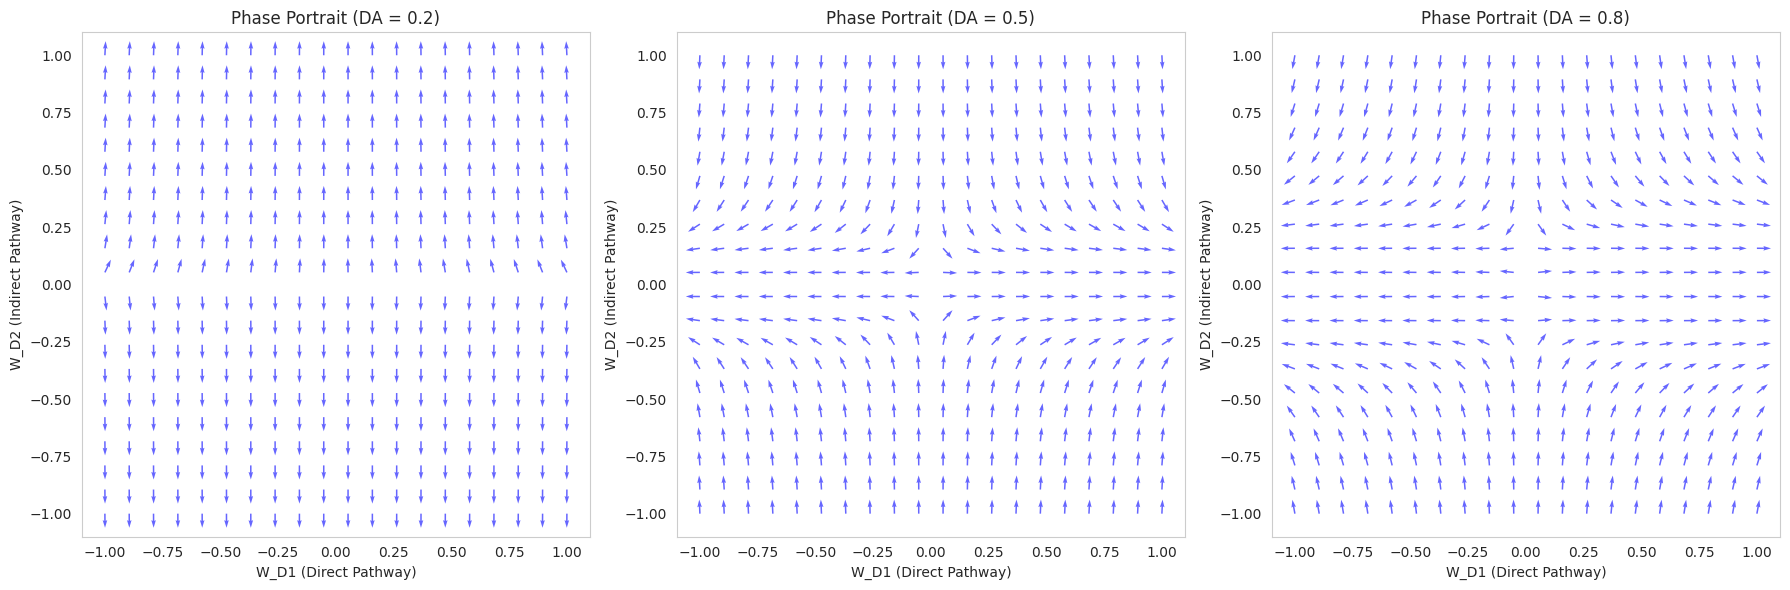

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Model parameters
M_DA = 0.5
eta = 0.1
lambda_DA = 0.2
I_ext = 1.0
gamma = 0.1
u_max_D2 = 1.0

# Dopaminergic function
def f(DA, Ca_D2, W_D2):
    if DA < M_DA and Ca_D2 > 0:
        return -10 * (DA - M_DA)
    elif DA < M_DA and Ca_D2 <= 0:
        return -40 * (DA - M_DA)
    elif DA >= M_DA and Ca_D2 * W_D2 > 0:
        return 0.1 * (DA - M_DA)
    else:
        return 0

# Dynamical system
def dynamics(t, y):
    W_D1, W_D2, alpha, DA = y

    Ca_D1 = np.tanh(W_D1)
    Ca_D2 = np.tanh(W_D2)

    dW_D1_dt = 0.5 * DA * Ca_D1 - 0.3 * alpha * W_D1
    dW_D2_dt = f(DA, Ca_D2, W_D2) * Ca_D2 - 3 * alpha * Ca_D2**2 * W_D2

    dAlpha_dt = -alpha + max(0, W_D2 - 0.5)
    dDA_dt = -lambda_DA * DA + I_ext

    return [dW_D1_dt, dW_D2_dt, dAlpha_dt, dDA_dt]

# Generate phase portrait grid
W_D1_vals = np.linspace(-1, 1, 20)
W_D2_vals = np.linspace(-1, 1, 20)
W_D1_grid, W_D2_grid = np.meshgrid(W_D1_vals, W_D2_vals)
dW_D1_vals, dW_D2_vals = np.zeros(W_D1_grid.shape), np.zeros(W_D2_grid.shape)

# Fix DA and alpha at specific values
fixed_DA = [0.2, 0.5, 0.8]  # Low, Normal, High Dopamine levels
alpha_fixed = 0.5

# Compute vector field for different dopamine levels
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, DA_fixed in enumerate(fixed_DA):
    for i in range(W_D1_grid.shape[0]):
        for j in range(W_D1_grid.shape[1]):
            W_D1, W_D2 = W_D1_grid[i, j], W_D2_grid[i, j]
            derivatives = dynamics(0, [W_D1, W_D2, alpha_fixed, DA_fixed])
            dW_D1_vals[i, j], dW_D2_vals[i, j] = derivatives[0], derivatives[1]

    # Normalize arrows for better visualization
    norm = np.sqrt(dW_D1_vals**2 + dW_D2_vals**2)
    norm[norm == 0] = 1  # Avoid division by zero
    dW_D1_norm, dW_D2_norm = dW_D1_vals / norm, dW_D2_vals / norm

    # Plot phase portrait
    ax = axes[idx]
    ax.quiver(W_D1_grid, W_D2_grid, dW_D1_norm, dW_D2_norm, color='blue', alpha=0.6)
    ax.set_xlabel("W_D1 (Direct Pathway)")
    ax.set_ylabel("W_D2 (Indirect Pathway)")
    ax.set_title(f"Phase Portrait (DA = {DA_fixed})")
    ax.grid()

plt.tight_layout()
plt.show()

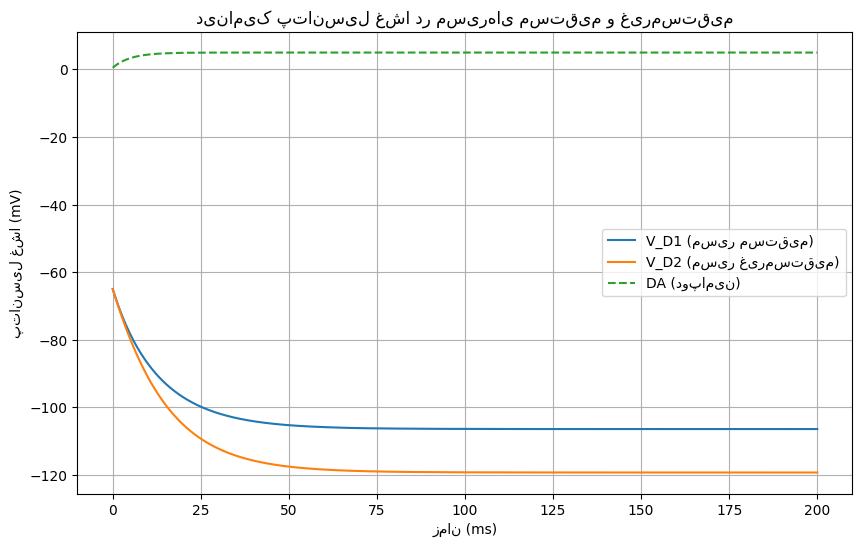

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# پارامترهای مدل
C_m = 1.0  # ظرفیت غشا
g_L = 0.1  # رسانایی نشت
E_L = -65  # پتانسیل تعادل نشت (mV)
E_exc = 0   # پتانسیل تعادل تحریک‌کننده (mV)
E_inh = -70  # پتانسیل تعادل مهاری (mV)

g_exc = 0.05  # رسانایی تحریک‌کننده
g_inh = 0.02  # رسانایی مهاری

M_DA = 0.5  # مقدار پایه دوپامین
k_D1 = 0.1  # تأثیر دوپامین بر مسیر مستقیم
k_D2 = 0.1  # تأثیر دوپامین بر مسیر غیرمستقیم

# تابع سیستم دینامیکی
def neuron_dynamics(t, y):
    V_D1, V_D2, DA = y

    # جریان‌های سیناپسی
    I_syn_D1 = g_exc * (V_D1 - E_exc) - g_inh * (V_D1 - E_inh)
    I_syn_D2 = g_exc * (V_D2 - E_exc) - g_inh * (V_D2 - E_inh)

    # تأثیر دوپامین
    I_DA_D1 = k_D1 * (DA - M_DA)
    I_DA_D2 = -k_D2 * (DA - M_DA)

    # معادلات دینامیکی
    dV_D1_dt = (-g_L * (V_D1 - E_L) + I_syn_D1 + I_DA_D1) / C_m
    dV_D2_dt = (-g_L * (V_D2 - E_L) + I_syn_D2 + I_DA_D2) / C_m
    dDA_dt = -0.2 * DA + 1.0  # ورودی دوپامین

    return [dV_D1_dt, dV_D2_dt, dDA_dt]

# شرایط اولیه
y0 = [-65, -65, 0.5]
t_span = (0, 200)
t_eval = np.linspace(0, 200, 1000)

# حل معادلات
sol = solve_ivp(neuron_dynamics, t_span, y0, t_eval=t_eval)

# نمایش نتایج
plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[0], label="V_D1 (مسیر مستقیم)")
plt.plot(sol.t, sol.y[1], label="V_D2 (مسیر غیرمستقیم)")
plt.plot(sol.t, sol.y[2], label="DA (دوپامین)", linestyle="dashed")
plt.xlabel("زمان (ms)")
plt.ylabel("پتانسیل غشا (mV)")
plt.legend()
plt.title("دینامیک پتانسیل غشا در مسیرهای مستقیم و غیرمستقیم")
plt.grid()
plt.show()

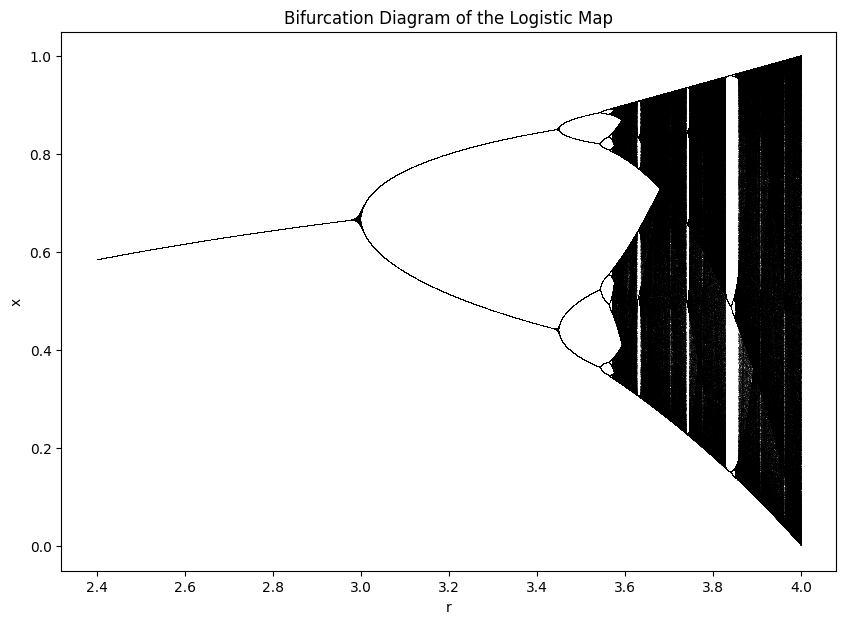

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تعریف تابع لجستیک
def logistic_map(r, x):
    return r * x * (1 - x)

# تولید داده‌های لجستیک برای مقادیر مختلف r
def generate_data(r, x_init=0.5, num_iterations=1000, transient_iterations=200):
    x = np.empty(num_iterations)
    x[0] = x_init
    for i in range(1, num_iterations):
        x[i] = logistic_map(r, x[i - 1])
    return x[transient_iterations:]  # حذف دوره‌ی گذرا

# تنظیمات اولیه
r_values = np.linspace(2.4, 4.0, 10000)  # مقادیر مختلف پارامتر r
x_init = 0.5  # مقدار اولیه
num_iterations = 1000  # تعداد تکرارها
transient_iterations = 200  # تعداد تکرارهای گذرا

# رسم نمودار
plt.figure(figsize=(10, 7))
for r in r_values:
    x = generate_data(r, x_init, num_iterations, transient_iterations)
    plt.plot([r] * len(x), x, ',k', alpha=0.25)  # رسم نقاط
plt.title("Bifurcation Diagram of the Logistic Map")
plt.xlabel("r")
plt.ylabel("x")
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# تابع فعال‌سازی هیپربولیک تانژانت
def tanh_activation(x):
    return np.tanh(x)

# تابع نویز (برای شبیه‌سازی بهتر پویایی)
def noise():
    return np.random.normal(0, noise_level)

# سیستم معادلات دیفرانسیل
def dynamics(t, y, m3_delayed, W_12, W_21, W_23, M1, M2):
    m1, m2 = y  # پتانسیل‌های غشای نرون‌ها

    # محاسبه معادلات دیفرانسیل
    dm1_dt = (-m1 + W_12 * tanh_activation(m2) + M1 + noise()) / tau
    dm2_dt = (-m2 - W_21 * tanh_activation(m1) + W_23 * m3_delayed + M2 + noise()) / tau

    return [dm1_dt, dm2_dt]

# تابع برای پیدا کردن نقاط ثابت
def find_fixed_points(W_12, W_21, W_23, M1, M2, tau, m3_delayed):
    # معادلات برای نقاط ثابت
    def fixed_point_system(y):
        m1, m2 = y
        # معادلات پتانسیل‌های ثابت (که تغییرات برابر صفر است)
        dm1_dt = (-m1 + W_12 * tanh_activation(m2) + M1) / tau
        dm2_dt = (-m2 - W_21 * tanh_activation(m1) + W_23 * m3_delayed + M2) / tau
        return [dm1_dt, dm2_dt]

    # جستجوی عددی برای نقاط ثابت
    from scipy.optimize import fsolve
    fixed_points = fsolve(fixed_point_system, [0.0, 0.0])  # شروع از [0, 0] به‌عنوان مقدار اولیه
    return fixed_points

# تنظیمات پارامترها
tau = 10.0  # زمان ثابت برای تغییرات پتانسیل‌های غشا
noise_level = 0.1  # سطح نویز
M1 = 0.0  # ورودی خارجی ثابت برای m1
M2 = 0.0  # ورودی خارجی ثابت برای m2

# مقادیر اولیه برای تأخیر m3
m3_delayed = np.zeros(1000)
delay_time = 5  # تأخیر در m3
m3_delayed[delay_time:] = 0.5  # فرض مقدار ثابت برای m3 بعد از تأخیر

# مقدار وزن‌ها برای تحلیل
W_12_values = np.linspace(0.1, 1.0, 10)  # تغییرات وزن W_12
W_21_values = np.linspace(0.1, 1.0, 10)  # تغییرات وزن W_21
W_23_values = np.linspace(0.1, 1.0, 10)  # تغییرات وزن W_23

# لیستی برای ذخیره نقاط ثابت
fixed_points_m1 = []
fixed_points_m2 = []

# محاسبه نقاط ثابت برای هر ترکیب از وزن‌ها
for W_12 in W_12_values:
    for W_21 in W_21_values:
        for W_23 in W_23_values:
            fixed_point = find_fixed_points(W_12, W_21, W_23, M1, M2, tau, m3_delayed)
            fixed_points_m1.append(fixed_point[0])  # پتانسیل m1
            fixed_points_m2.append(fixed_point[1])  # پتانسیل m2

# رسم نمودار نقاط ثابت بر اساس تغییرات وزن‌ها
plt.figure(figsize=(10, 6))
plt.plot(W_12_values, fixed_points_m1[:len(W_12_values)], label="Membrane Potential m1", color='blue')
plt.plot(W_12_values, fixed_points_m2[:len(W_12_values)], label="Membrane Potential m2", color='red')
plt.xlabel("Synaptic Weight W_12")
plt.ylabel("Membrane Potential")
plt.title("Fixed Points of Membrane Potentials vs Synaptic Weight W_12")
plt.legend()
plt.grid(True)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# تابع فعال‌سازی هیپربولیک تانژانت
def tanh_activation(x):
    return np.tanh(x)

# تابع نویز (برای شبیه‌سازی بهتر پویایی)
def noise():
    return np.random.normal(0, noise_level)

# سیستم معادلات دیفرانسیل
def dynamics(t, y, m3_delayed, W_12, W_21, W_23, M1, M2):
    m1, m2 = y  # پتانسیل‌های غشای نرون‌ها

    # محاسبه معادلات دیفرانسیل
    dm1_dt = (-m1 + W_12 * tanh_activation(m2) + M1 + noise()) / tau
    dm2_dt = (-m2 - W_21 * tanh_activation(m1) + W_23 * m3_delayed + M2 + noise()) / tau

    return [dm1_dt, dm2_dt]

# تابع برای پیدا کردن نقاط ثابت
def find_fixed_points(W_12, W_21, W_23, M1, M2, tau, m3_delayed):
    # معادلات برای نقاط ثابت
    def fixed_point_system(y):
        m1, m2 = y
        # معادلات پتانسیل‌های ثابت (که تغییرات برابر صفر است)
        dm1_dt = (-m1 + W_12 * tanh_activation(m2) + M1) / tau
        dm2_dt = (-m2 - W_21 * tanh_activation(m1) + W_23 * m3_delayed + M2) / tau
        return [dm1_dt, dm2_dt]

    # جستجوی عددی برای نقاط ثابت
    fixed_points = fsolve(fixed_point_system, [0.0, 0.0])  # شروع از [0, 0] به‌عنوان مقدار اولیه
    return fixed_points

# تنظیمات پارامترها
tau = 10.0  # زمان ثابت برای تغییرات پتانسیل‌های غشا
noise_level = 0.1  # سطح نویز
M1 = 0.0  # ورودی خارجی ثابت برای m1
M2 = 0.0  # ورودی خارجی ثابت برای m2

# مقادیر اولیه برای تأخیر m3
m3_delayed = np.zeros(1000)
delay_time = 5  # تأخیر در m3
m3_delayed[delay_time:] = 0.5  # فرض مقدار ثابت برای m3 بعد از تأخیر

# مقدار وزن‌ها برای تحلیل
W_12_values = np.linspace(0.1, 1.0, 10)  # تغییرات وزن W_12
W_21_values = np.linspace(0.1, 1.0, 10)  # تغییرات وزن W_21
W_23_values = np.linspace(0.1, 1.0, 10)  # تغییرات وزن W_23

# لیستی برای ذخیره نقاط ثابت
fixed_points_m1 = []
fixed_points_m2 = []

# محاسبه نقاط ثابت برای هر ترکیب از وزن‌ها
for W_12 in W_12_values:
    for W_21 in W_21_values:
        for W_23 in W_23_values:
            fixed_point = find_fixed_points(W_12, W_21, W_23, M1, M2, tau, m3_delayed)
            fixed_points_m1.append(fixed_point[0])  # پتانسیل m1
            fixed_points_m2.append(fixed_point[1])  # پتانسیل m2

# تبدیل به آرایه numpy
fixed_points_m1 = np.array(fixed_points_m1)
fixed_points_m2 = np.array(fixed_points_m2)

# رسم نمودار نقاط ثابت بر اساس تغییرات وزن‌ها
plt.figure(figsize=(10, 6))
plt.plot(W_12_values, fixed_points_m1[:len(W_12_values)], label="Membrane Potential m1", color='blue')
plt.plot(W_12_values, fixed_points_m2[:len(W_12_values)], label="Membrane Potential m2", color='red')
plt.xlabel("Synaptic Weight W_12")
plt.ylabel("Membrane Potential")
plt.title("Fixed Points of Membrane Potentials vs Synaptic Weight W_12")
plt.legend()
plt.grid(True)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.